# M17 UC1 Analisys

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from astropy.io import fits
import pandas as pd
import subprocess #para CASA

In [1]:
import sys
sys.path.append('/home/jennifer/fits_plotting_tool')
from fits_plotter3 import FITSPlotter

### Comparaciones entre las muestras analizadas
Este es un resumen que encierra los tamaños aproximados de las muestras usadas para cada caso.

In [6]:
df = pd.read_csv("comparacion_muestras.csv")
df

Grupo de Muestras        Cube Size Image Size (arcsec²)  \
0       Líneas moleculares de M17-UC1  2430x2430x478x1            0.57x0.57   
1  Líneas de recombinación de M17-UC1  2430x2430x478x1            0.57x0.57   
2           Muestras de la nube M17SW   140x126x2043x1            1.17x1.05   

   Pixel Scale    Beam Size  
0        0.014  0.097x0.040  
1        0.014  0.098x0.043  
2        0.500  4.694x2.576

Las siguientes imágenes compara la escala entre el medio más extendido y las muestras de UC1.

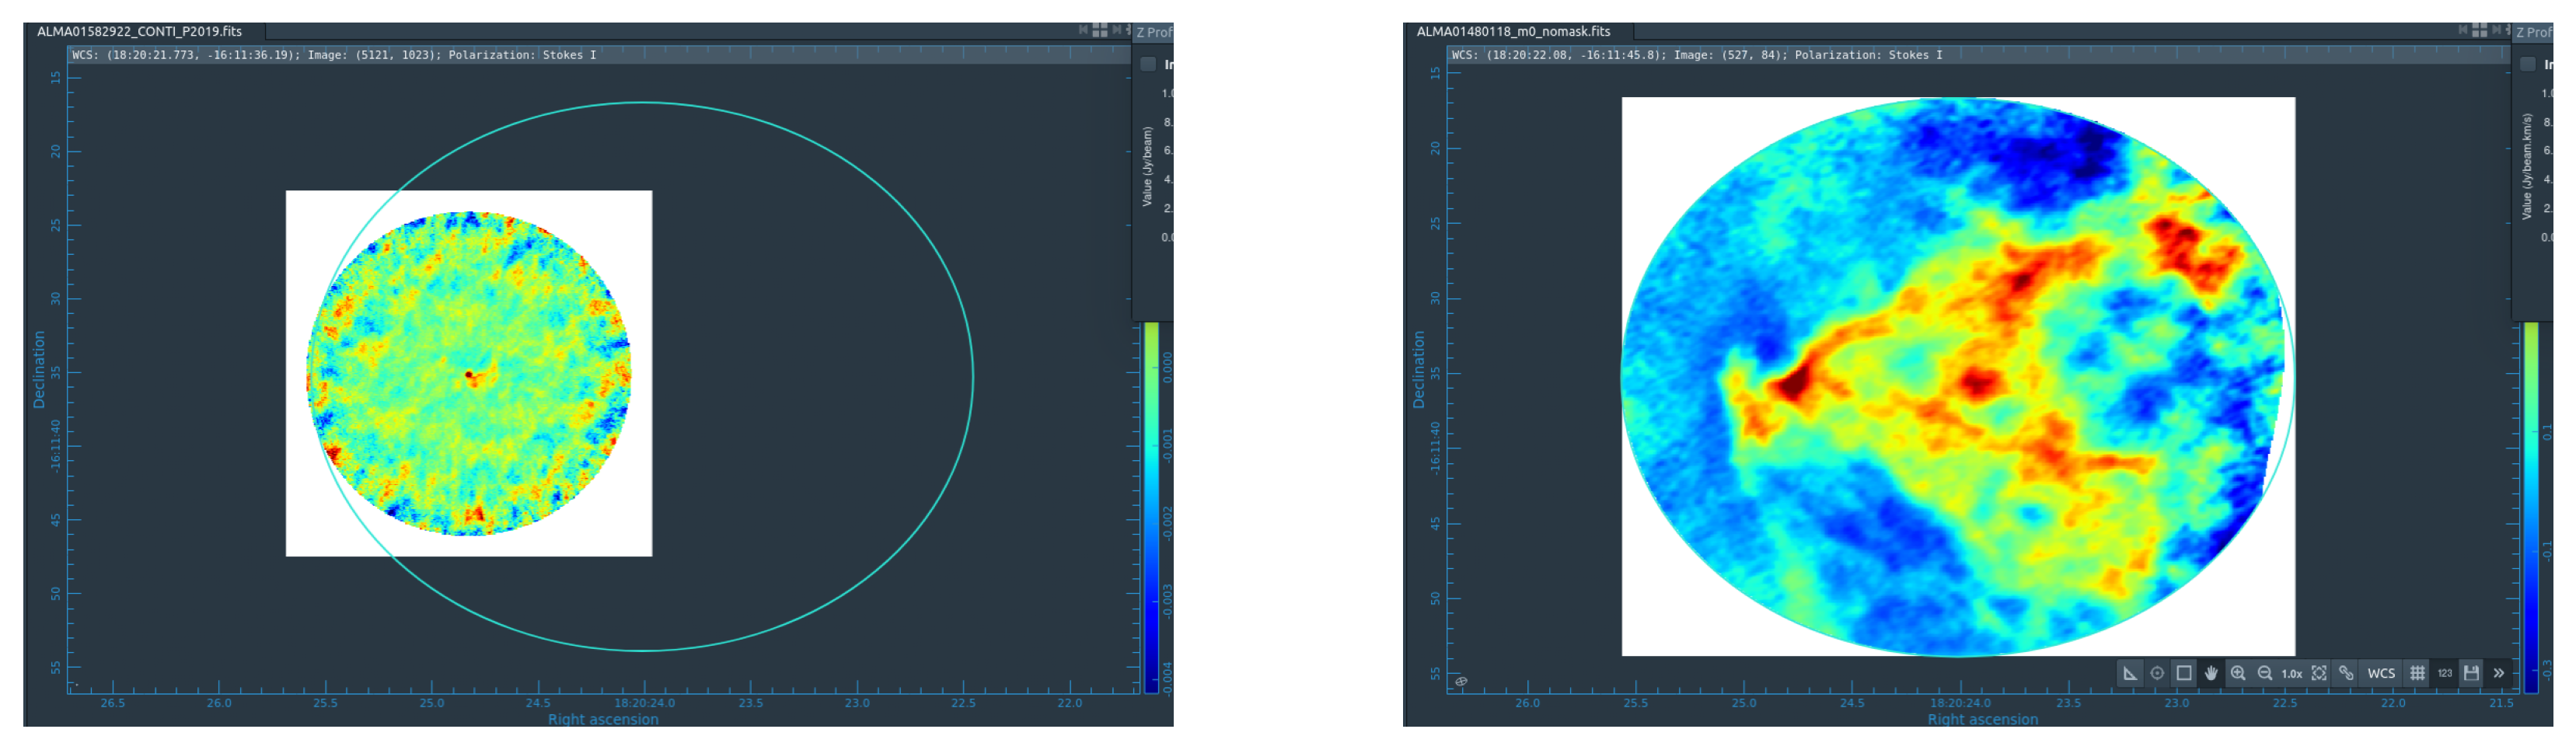

In [13]:
# Rutas de las imágenes
img1_path = "images/extend_comp1.png"
img2_path = "images/extend_comp2.png"

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # (1 fila, 2 columnas)

# Cargar y mostrar la primera imagen
img1 = mpimg.imread(img1_path)
axes[0].imshow(img1)
axes[0].axis("off")  # Ocultar ejes
#axes[0].set_title("Imagen 1")

# Cargar y mostrar la segunda imagen
img2 = mpimg.imread(img2_path)
axes[1].imshow(img2)
axes[1].axis("off")  # Ocultar ejes
#axes[1].set_title("Imagen 2")

plt.show()

##### 1. Cálculo de contornos usando CASA (script casa_contornos2.py)


In [10]:
# Cálculo de contornos usando CASA (script casa_contornos2.py)
cmd = [
    "/home/jennifer/casa/casa-6.6.5-31-py3.10.el8/bin/casa",
    "--nologger", "--nogui", "-c",
    "/home/jennifer/fits_plotting_tool/casa_contornos2.py", "/home/jennifer/casa/M17_P2019/ALMA01480118_m1_3sigma.fits","1", "0", "15,17,19,21,23,25,27", "ALMA01480118__m1_contours.fits"
]
#"Uso: casa --nologger --nogui -c script_contornos.py <fits_file> <moment> <sigma> <multipliers> <output_fits>"
subprocess.run(cmd)


optional configuration file not found, continuing CASA startup without it

No event loop hook running.
Using matplotlib backend: module://matplotlib_inline.backend_inline
CASA 6.6.5.31 -- Common Astronomy Software Applications [6.6.5.31]
Directorio imagen_casa.im eliminado para evitar conflictos de sobrescritura.
Directorio contornos.im eliminado para evitar conflictos de sobrescritura.
Archivo ALMA01480118__m1_contours.fits eliminado para evitar conflictos de sobrescritura.
Proceso completado: Contornos generados para momento 1 con sigma=0.0 y múltiplos [15.0, 17.0, 19.0, 21.0, 23.0, 25.0, 27.0] <3


CompletedProcess(args=['/home/jennifer/casa/casa-6.6.5-31-py3.10.el8/bin/casa', '--nologger', '--nogui', '-c', '/home/jennifer/fits_plotting_tool/casa_contornos2.py', '/home/jennifer/casa/M17_P2019/ALMA01480118_m1_3sigma.fits', '1', '0', '15,17,19,21,23,25,27', 'ALMA01480118__m1_contours.fits'], returncode=0)

##### 2. Plotting *fits_plotter*

In [3]:
help(FITSPlotter)

Help on class FITSPlotter in module fits_plotter3:

class FITSPlotter(builtins.object)
 |  FITSPlotter(image_fits, sigma=0.003, ref_coord=None, ref_label=None, moment=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, image_fits, sigma=0.003, ref_coord=None, ref_label=None, moment=None)
 |      Parámetros:
 |          image_fits (str): Archivo FITS de la imagen base.
 |          sigma (float, opcional): Factor de escala para el mapa.
 |          ref_coord (str o tuple, opcional): Coordenadas del punto de referencia. Puede ser:
 |              - Una tupla (RA, Dec) en grados.
 |              - Un string en formato ICRS 'HH:MM:SS ±DD:MM:SS'.
 |          ref_label (str, opcional): Nombre del objeto a etiquetar.
 |          moment (str, opcional): Tipo de momento ('m0', 'm1', 'm2', 'continuo').
 |  
 |  plot(self, save_as=None, title='Mapa de Intensidad')
 |      Genera la visualización de la imagen FITS con punto de referencia opcional y tamaño del beam.
 |  
 |  ---------------

## Emiisión del medio circundante

El gas molecular en la nube **M17SW** actúa como el reservorio de material en interacción con M17-UC1.

Estudiar las emisiones extendidas alrededor de UC1 nos ayuda a entender mejor cómo estas regiones ultracompactas interactúan con su entorno. Estas emisiones no solo nos muestran la presencia de gas y polvo, sino que también nos revelan cómo la estrella joven está afectando el medio que la rodea. Analizar estas estructuras nos permite detectar flujos de materia, turbulencias y otros procesos dinámicos que juegan un papel clave en la evolución de la región. 

Revisé todas las muestras y seleciconé las que parecían más significativas por la calidad de la muestra y la molécula que trazaba. En la siguiente imagen muestro como ejemplo una muestra escogida que presenta una línea marcada de HNCO:


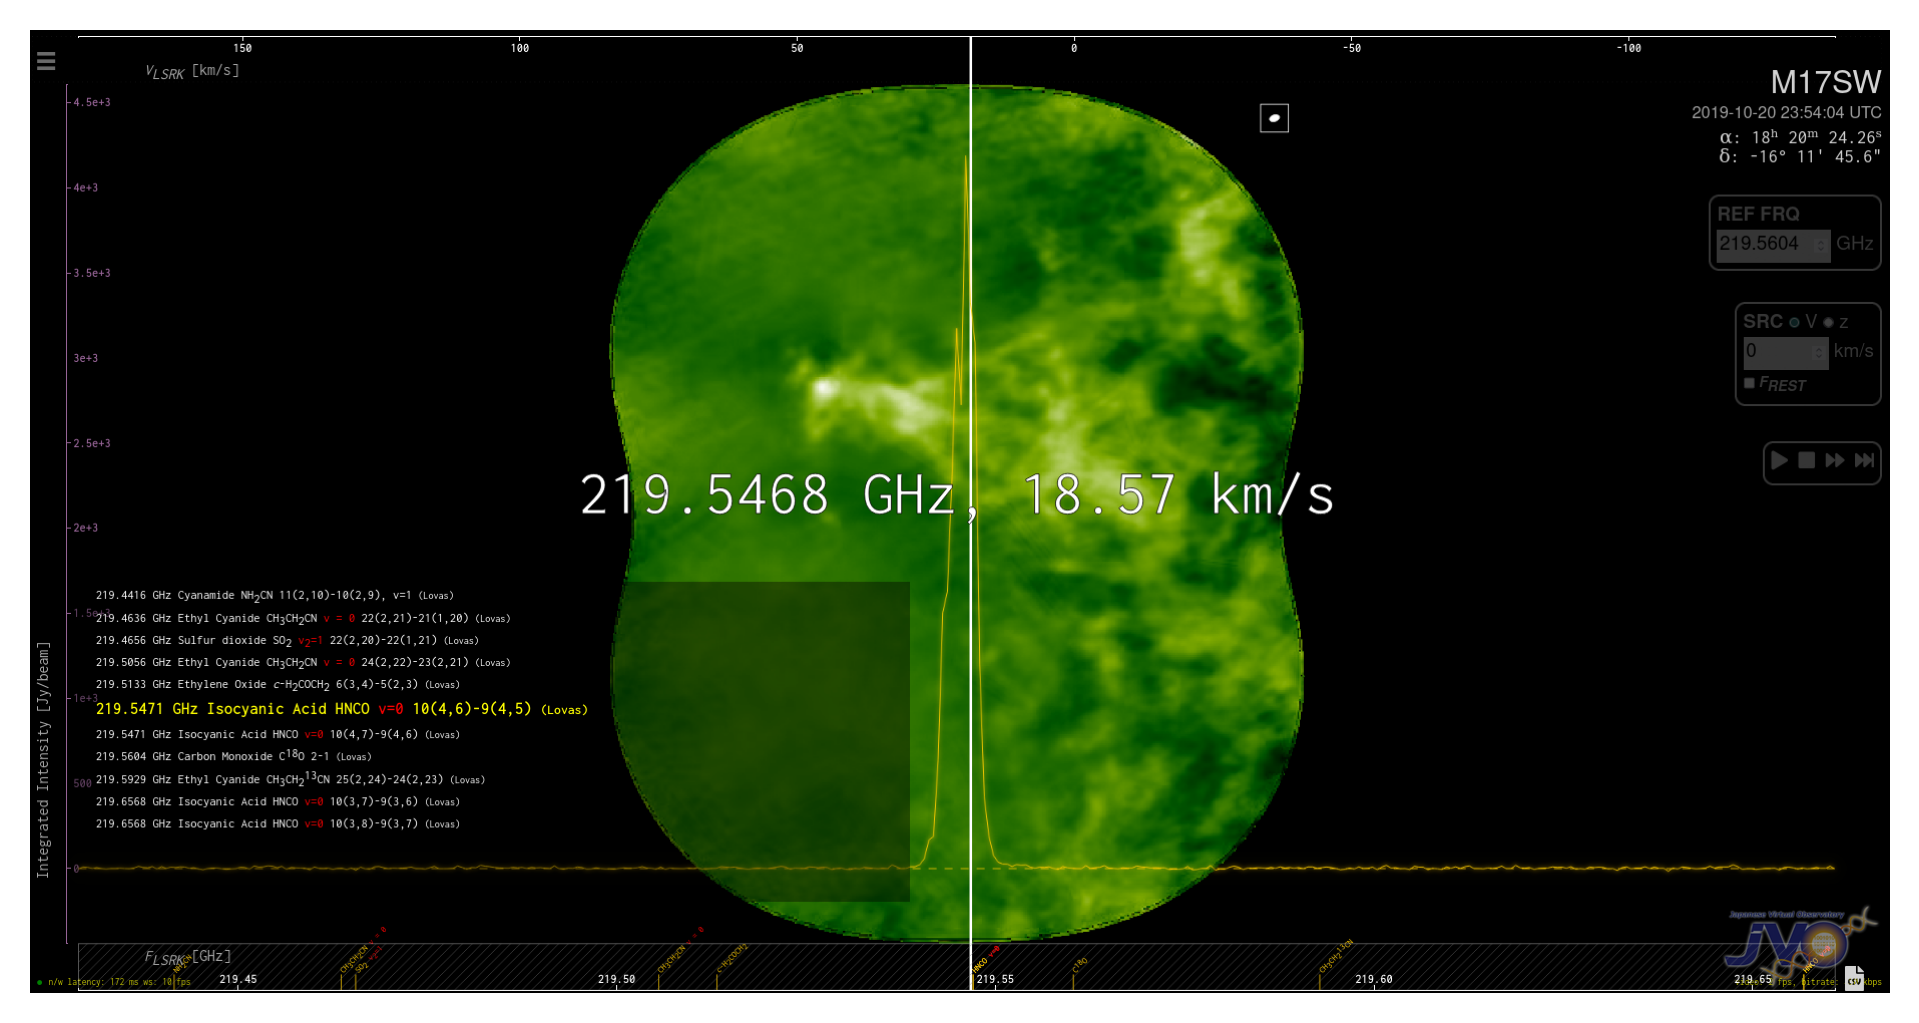

In [18]:
#############################
image_path = "images/0118.png"
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 6)) 
plt.imshow(img)
plt.axis("off")  # Ocultar ejes
plt.show()

### ALMA01480118: HNCO

- $\sigma$ promedio: 0.007918
- 3$\sigma$: 0.023755
- Se observa un gradiante de $8km/s$ si se usa una mask de 3$\sigma$

Nombres de archivos de contornoubicados en el repositorio de radio análisis :
ALMA01480118__m0_contours.fits
ALMA01480118__m1_contours.fits

### ALMA01507452: 13CO

- $\sigma$ promedio: 0.007918
- 3$\sigma$: 0.023755
- No se observa un gradiente de v

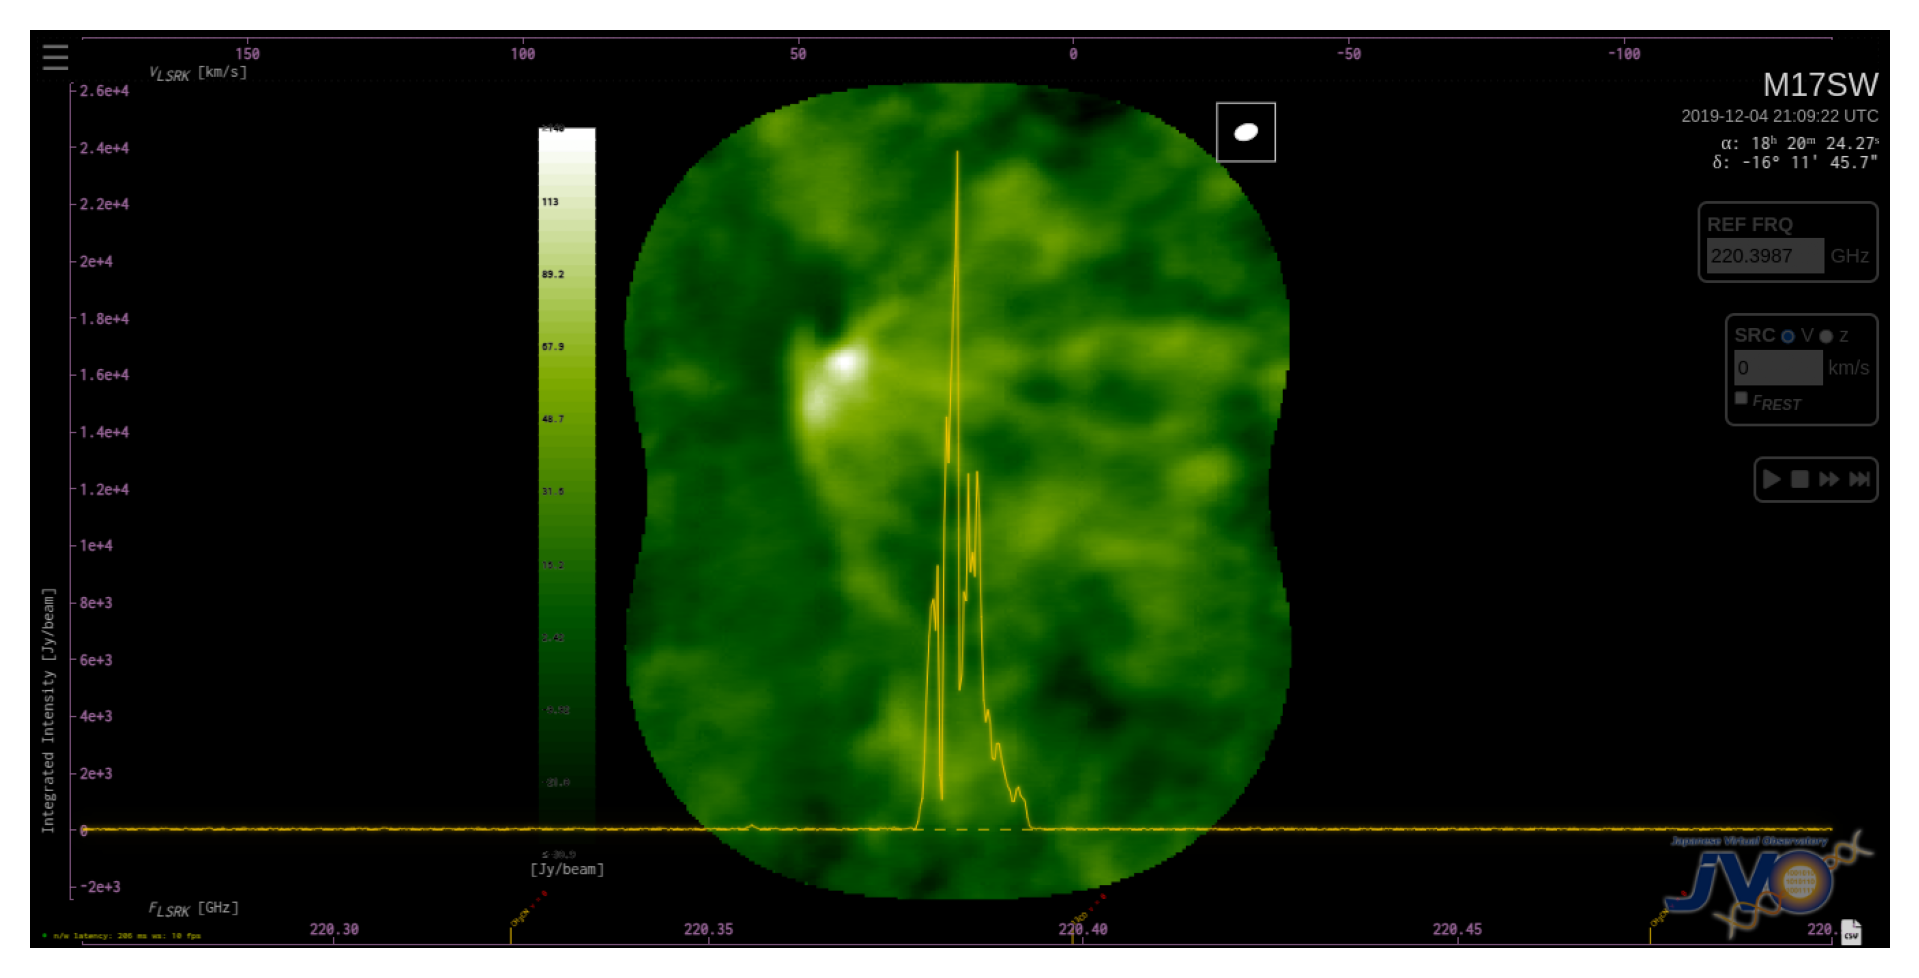

In [12]:
image_path = "images/7452.png"
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 6))  # Ajustar tamaño
plt.imshow(img)
plt.axis("off")  # Ocultar ejes
plt.show()

Primeras filas del archivo:
   220.37367381019655  -7.8963603730e-5
0          220.373796          0.000290
1          220.373918          0.000839
2          220.374040          0.000583
3          220.374162          0.000275
4          220.374284          0.000597
Columnas en el archivo: Index(['220.37367381019655', '-7.8963603730e-5'], dtype='object')
Máxima intensidad: 0.82558 Jy/beam a 220.38320 GHz


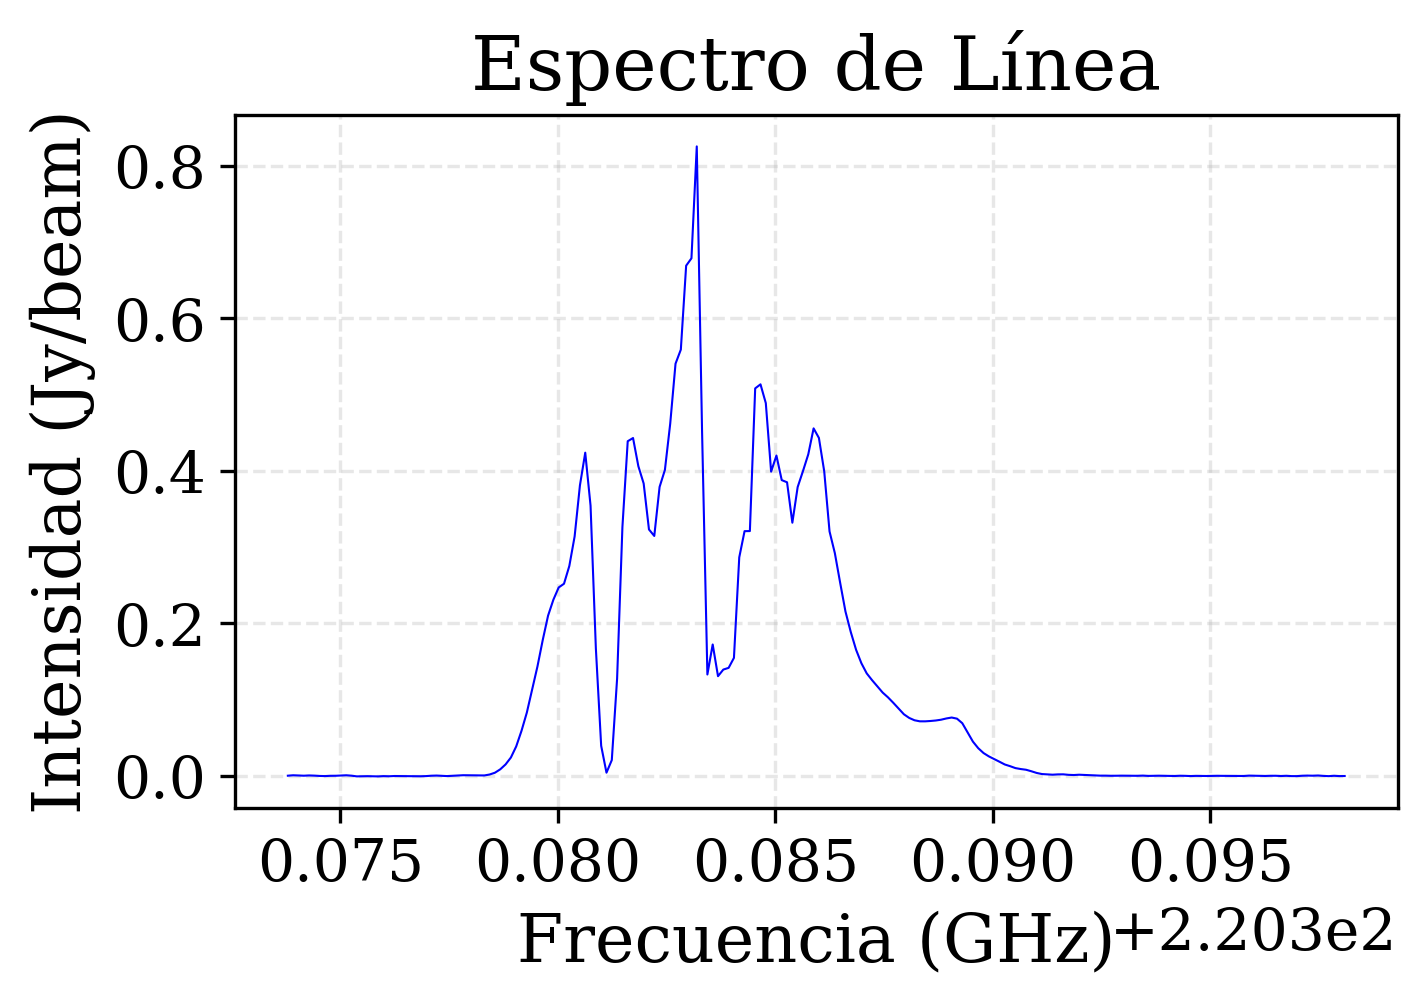

In [8]:
# Ruta del archivo
file_path = "/home/holman/FILES/M17_P2019/ALMA01507452.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-02-17-00-29-08.tsv"

# Cargar el archivo .tsv
spectral_data = pd.read_csv(file_path, sep='\t', comment='#')


# Mostrar las primeras filas del archivo
print("Primeras filas del archivo:")
print(spectral_data.head())

# Verificar las columnas disponibles
print("Columnas en el archivo:", spectral_data.columns)

# Suponiendo que las columnas sean ['Frecuencia', 'Intensidad']
frecuencia = spectral_data.iloc[:, 0]  # Primera columna
intensidad = spectral_data.iloc[:, 1]  # Segunda columna

# Encontrar el valor máximo de intensidad y su frecuencia correspondiente
max_intensidad = intensidad.max()
max_frecuencia = frecuencia[intensidad.idxmax()]
print(f"Máxima intensidad: {max_intensidad:.5f} Jy/beam a {max_frecuencia:.5f} GHz")


# Crear gráfica de frecuencia vs intensidad
plt.figure(figsize=(5, 3))
plt.plot(frecuencia, intensidad, color='blue', linewidth=0.5)
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Intensidad (Jy/beam)')
plt.title('Espectro de Línea')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


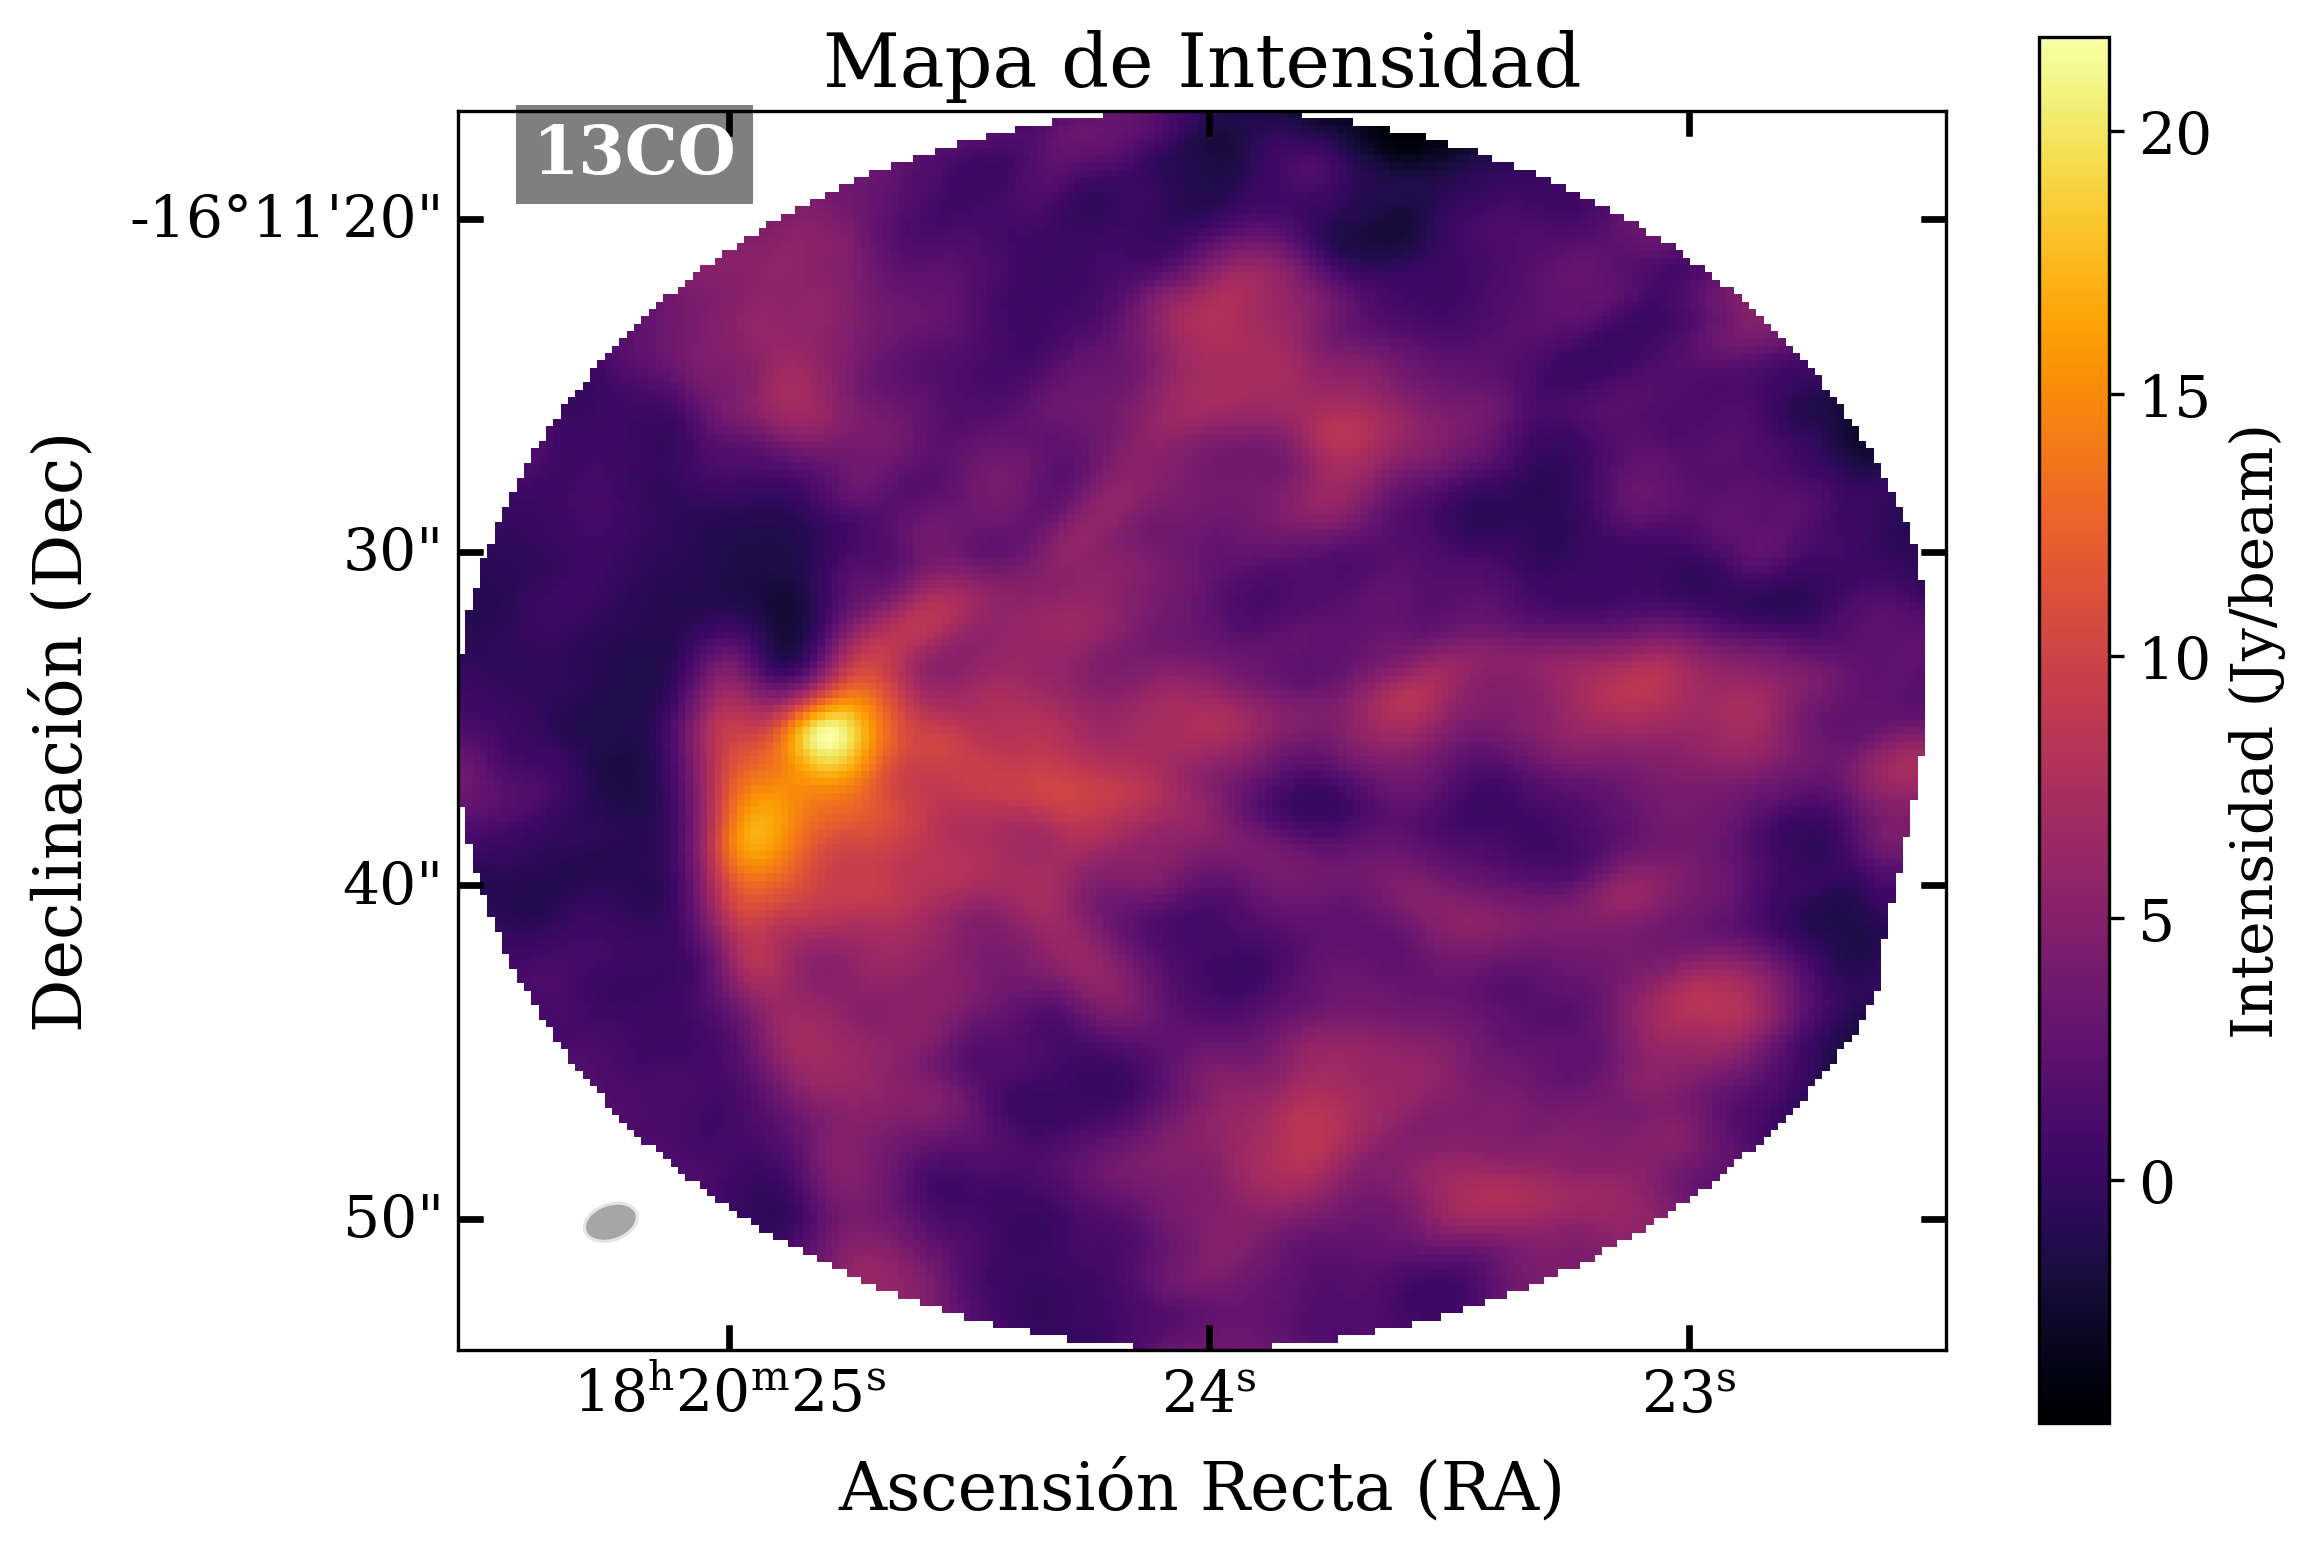

Archivos FITS cerrados.


In [21]:
#Flujo integrado

fits_file = "/home/holman/FILES/M17_P2019/ALMA01507452_m0_nomask.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(object_name="13CO")

#fits_file = "/home/holman/FILES/M17_P2019/ALMA01507452_m1_nomask.fits"
#plotter = FITSPlotter(image_fits=fits_file)
#plotter.plot(title="Mapa de velocidad", object_name="M17 SW")

plotter.close()


### ALMA01669401: 
#### CH3OCHO (formato de metilo)
#### 34SO2 (dioxido de azufre)
#### t-CH3CH2OH (etanol)

- $\sigma$ promedio: 0.0049949
- 3$\sigma$: 0.0149847
- CH3OCHO:Se observa un gradiante de $6km/s$ si se usa una mask de 3$\sigma$
- 34SO2:Se observa un gradiante de $3km/s$ si se usa una mask de 3$\sigma$
- t-CH3CH2OH: Se observa un gradiante de $4km/s$ si se usa una mask de 3$\sigma$

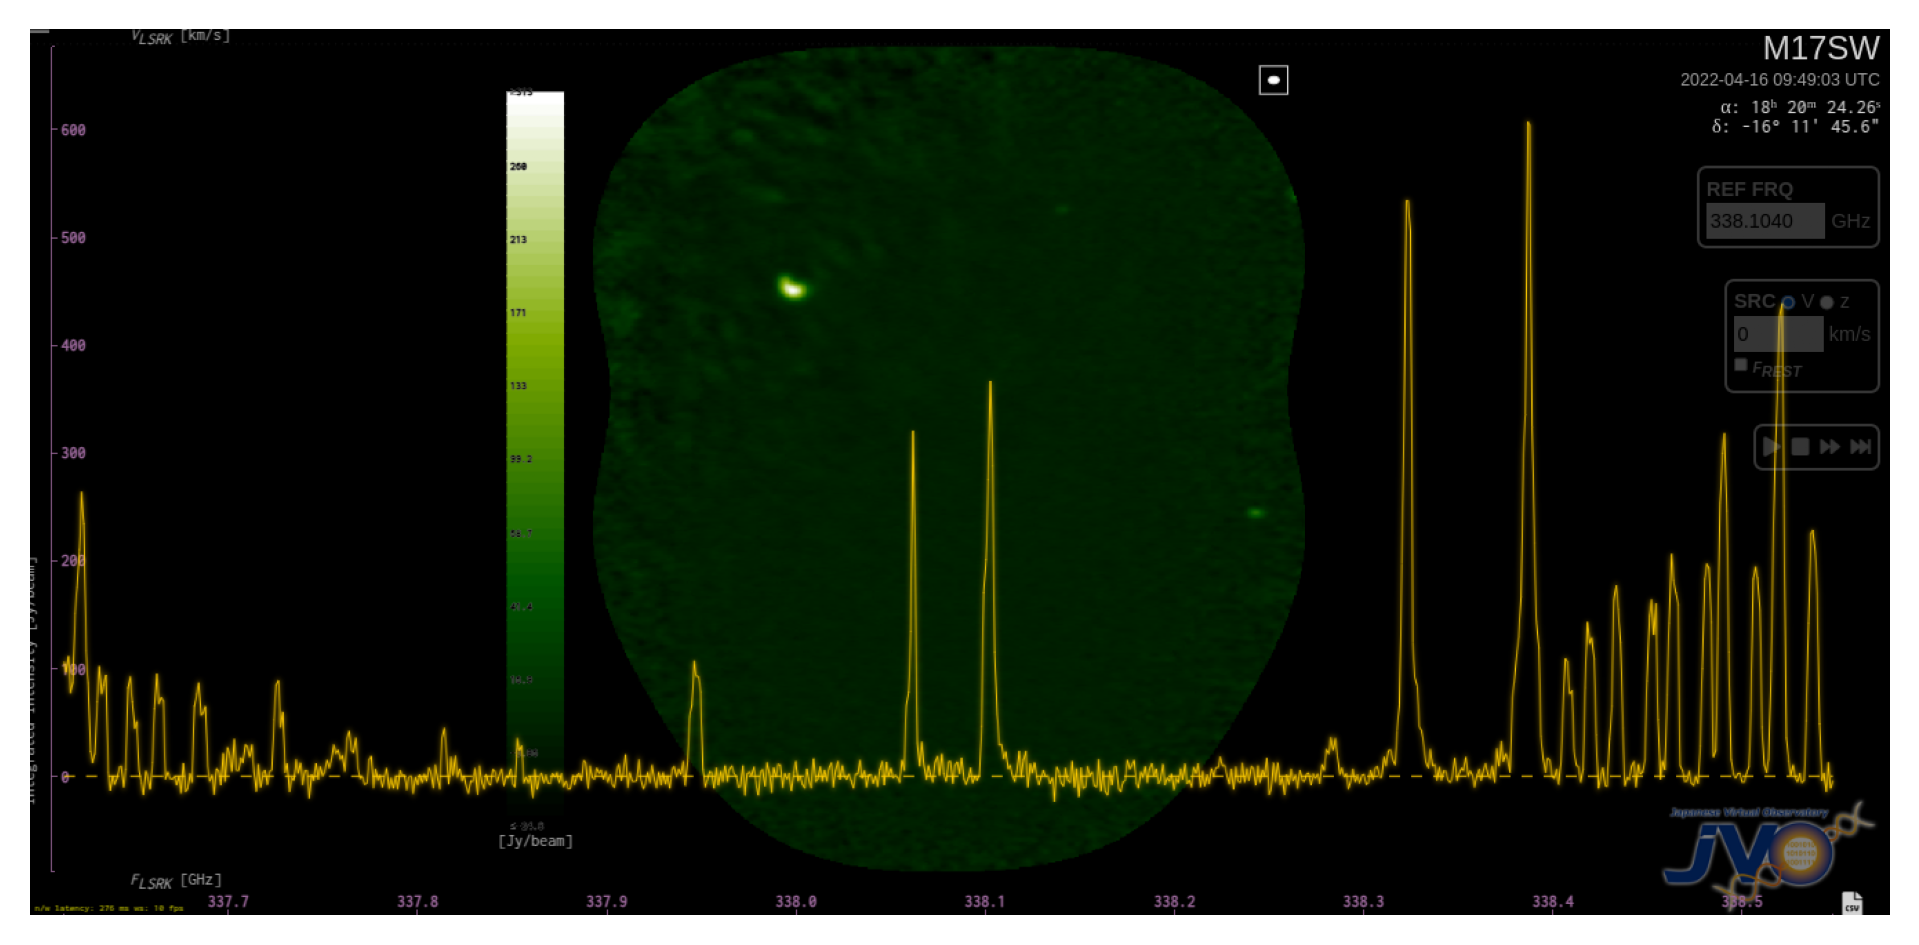

In [18]:
image_path = "images/9401.png"
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 6))  # Ajustar tamaño
plt.imshow(img)
plt.axis("off")  # Ocultar ejes
plt.show()

Primeras filas del archivo:
   337.6133041881  7.0867748385e-4
0      337.613793         0.000684
1      337.614281         0.000612
2      337.614769         0.000607
3      337.615258         0.000606
4      337.615746         0.000517
Columnas en el archivo: Index(['337.6133041881', '7.0867748385e-4'], dtype='object')
Máxima intensidad: 0.00395 Jy/beam a 338.38833 GHz


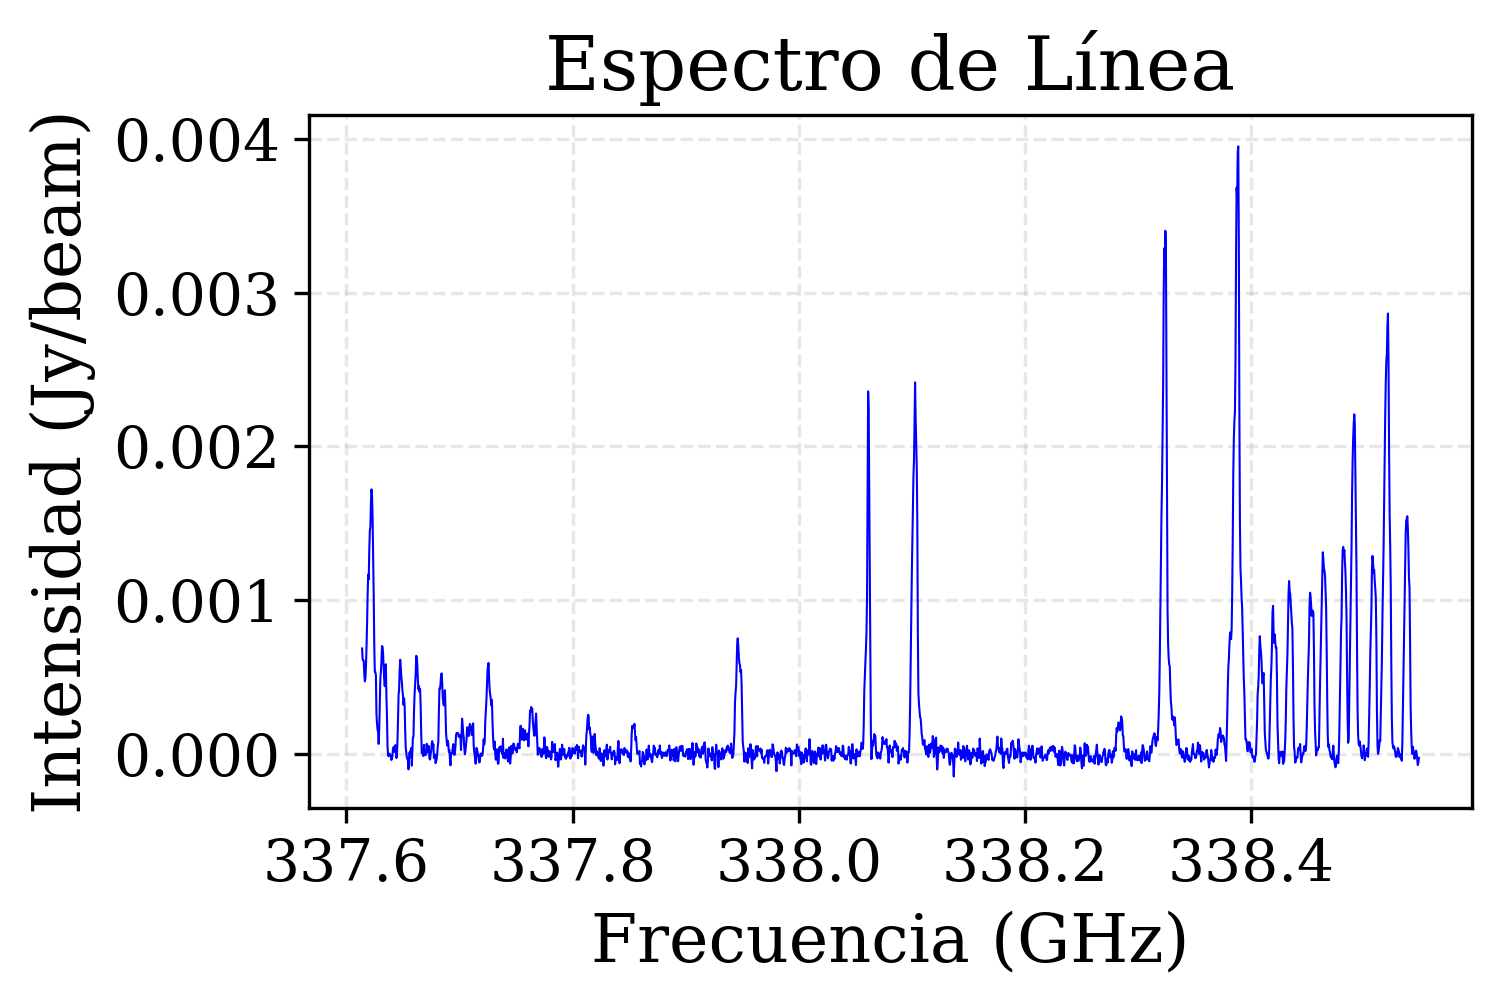

In [9]:
# Ruta del archivo
file_path = "/home/holman/FILES/M17_P2019/ALMA01669401.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-02-17-08-17-09.tsv"

# Cargar el archivo .tsv
spectral_data = pd.read_csv(file_path, sep='\t', comment='#')


# Mostrar las primeras filas del archivo
print("Primeras filas del archivo:")
print(spectral_data.head())

# Verificar las columnas disponibles
print("Columnas en el archivo:", spectral_data.columns)

# Suponiendo que las columnas sean ['Frecuencia', 'Intensidad']
frecuencia = spectral_data.iloc[:, 0]  # Primera columna
intensidad = spectral_data.iloc[:, 1]  # Segunda columna

# Encontrar el valor máximo de intensidad y su frecuencia correspondiente
max_intensidad = intensidad.max()
max_frecuencia = frecuencia[intensidad.idxmax()]
print(f"Máxima intensidad: {max_intensidad:.5f} Jy/beam a {max_frecuencia:.5f} GHz")


# Crear gráfica de frecuencia vs intensidad
plt.figure(figsize=(5, 3))
plt.plot(frecuencia, intensidad, color='blue', linewidth=0.5)
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Intensidad (Jy/beam)')
plt.title('Espectro de Línea')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


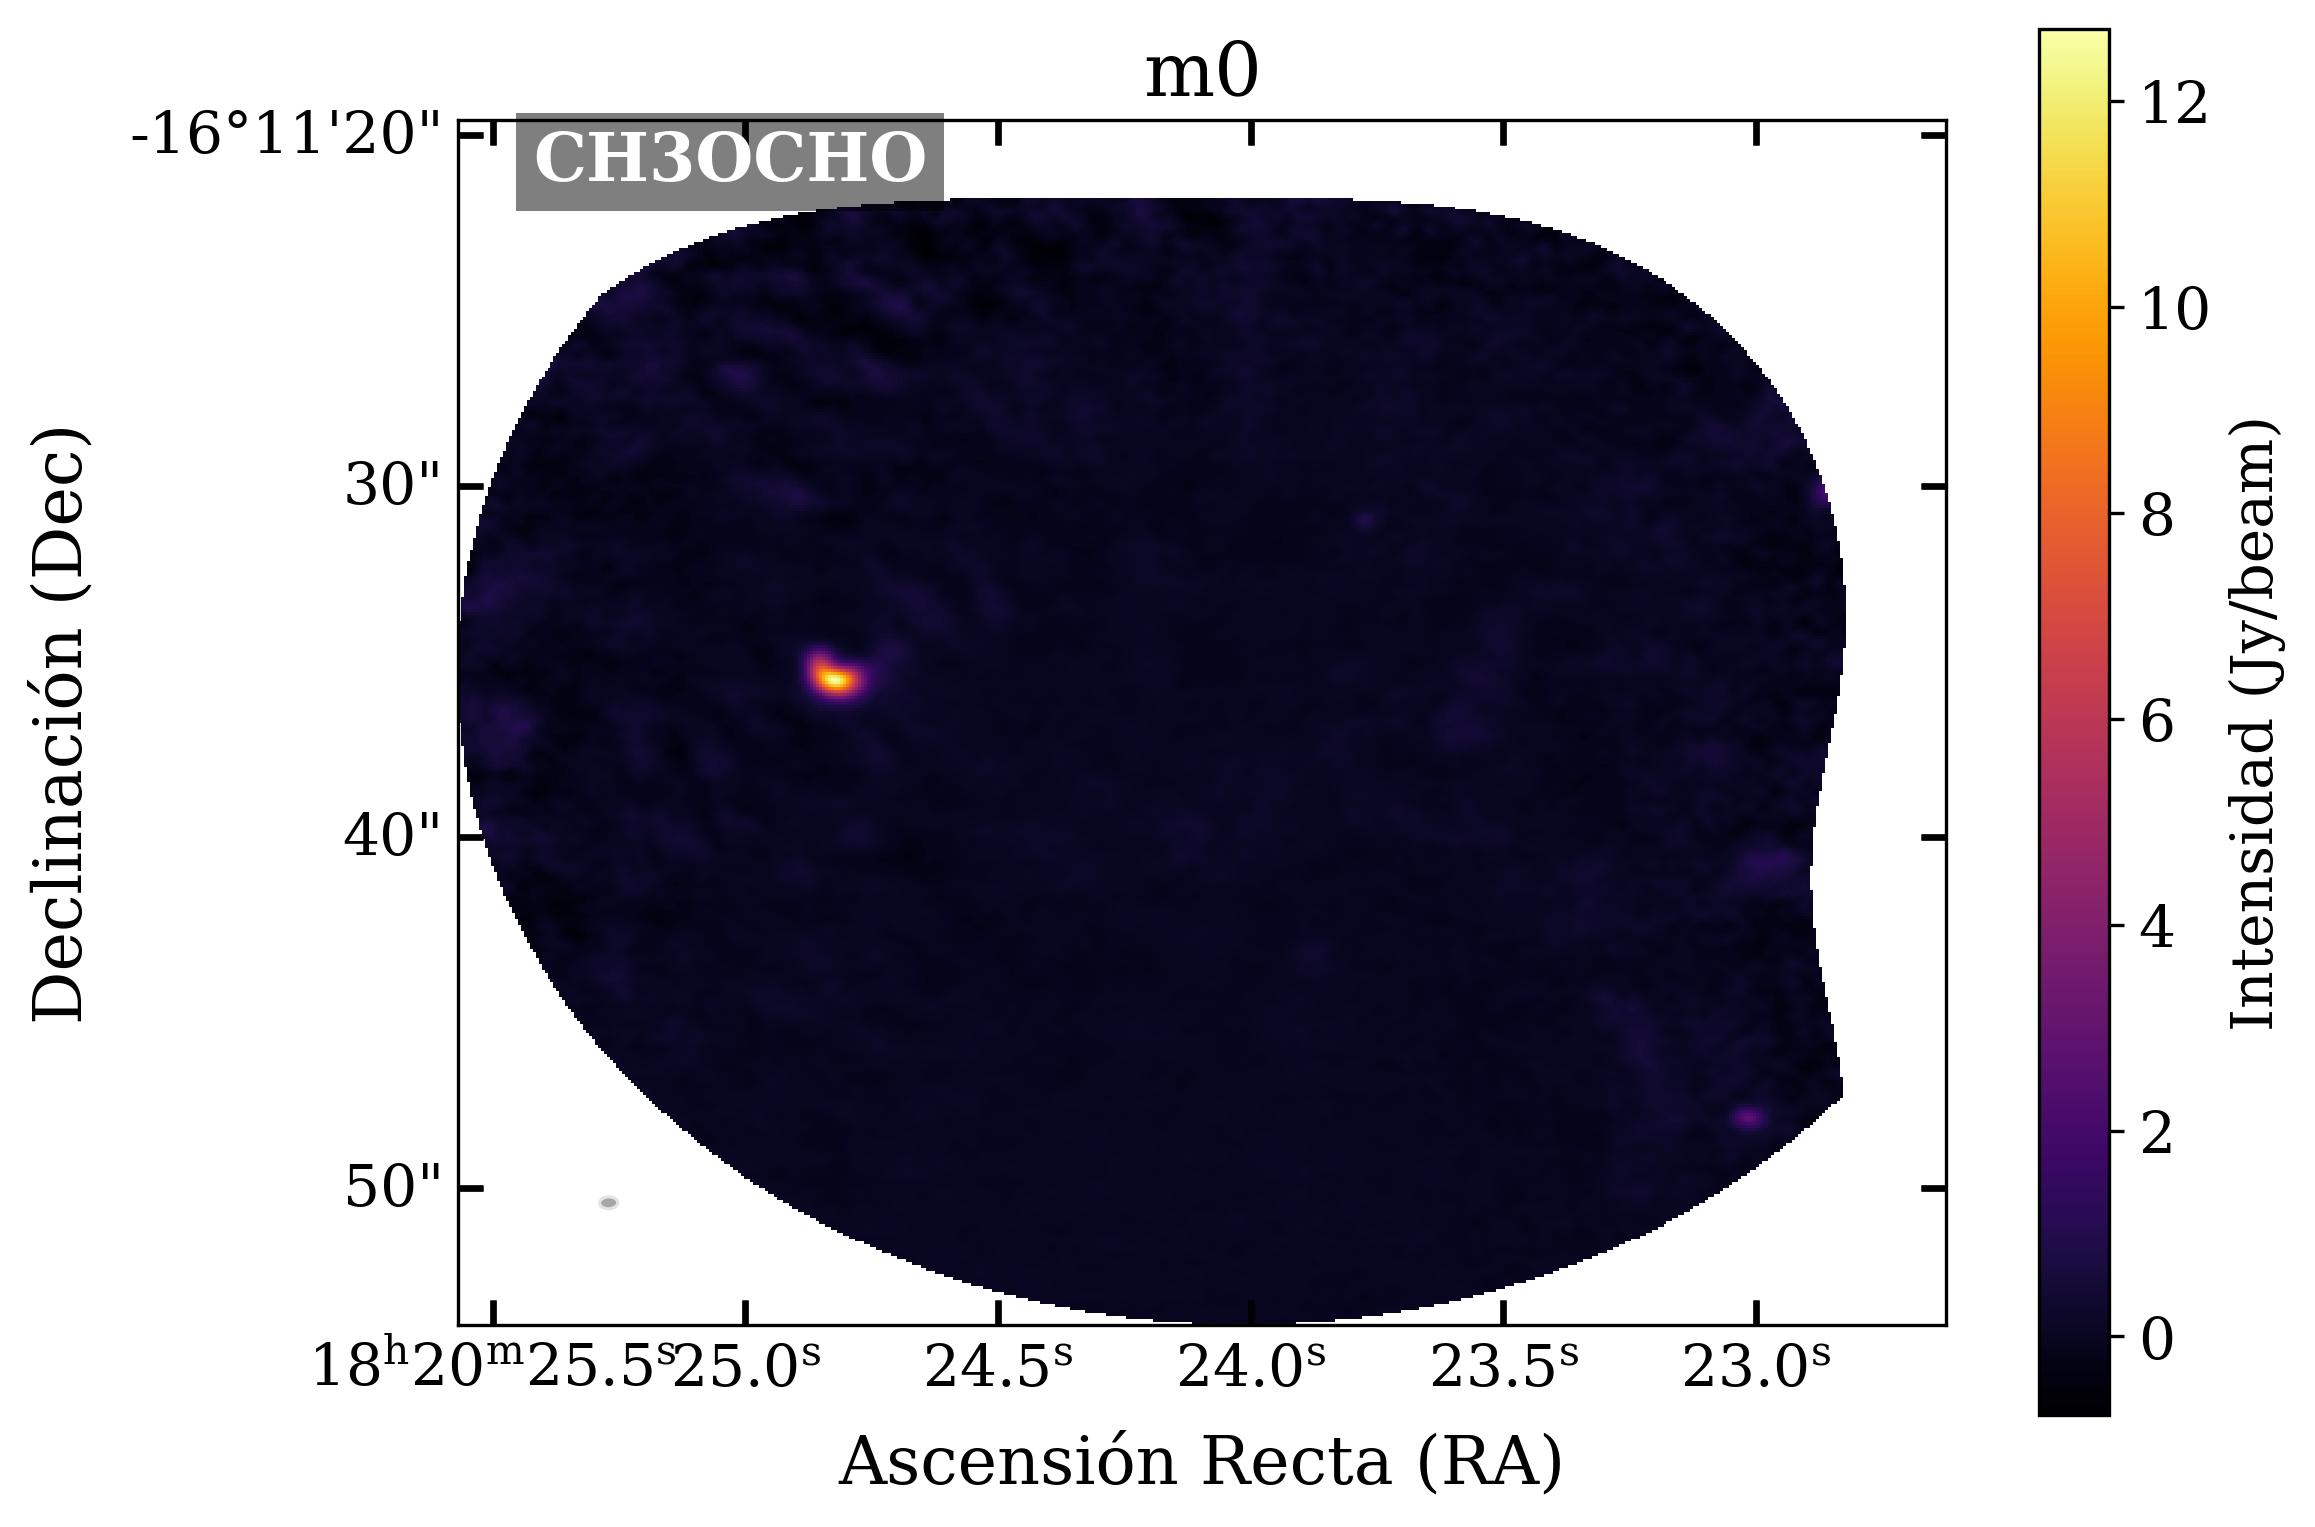

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


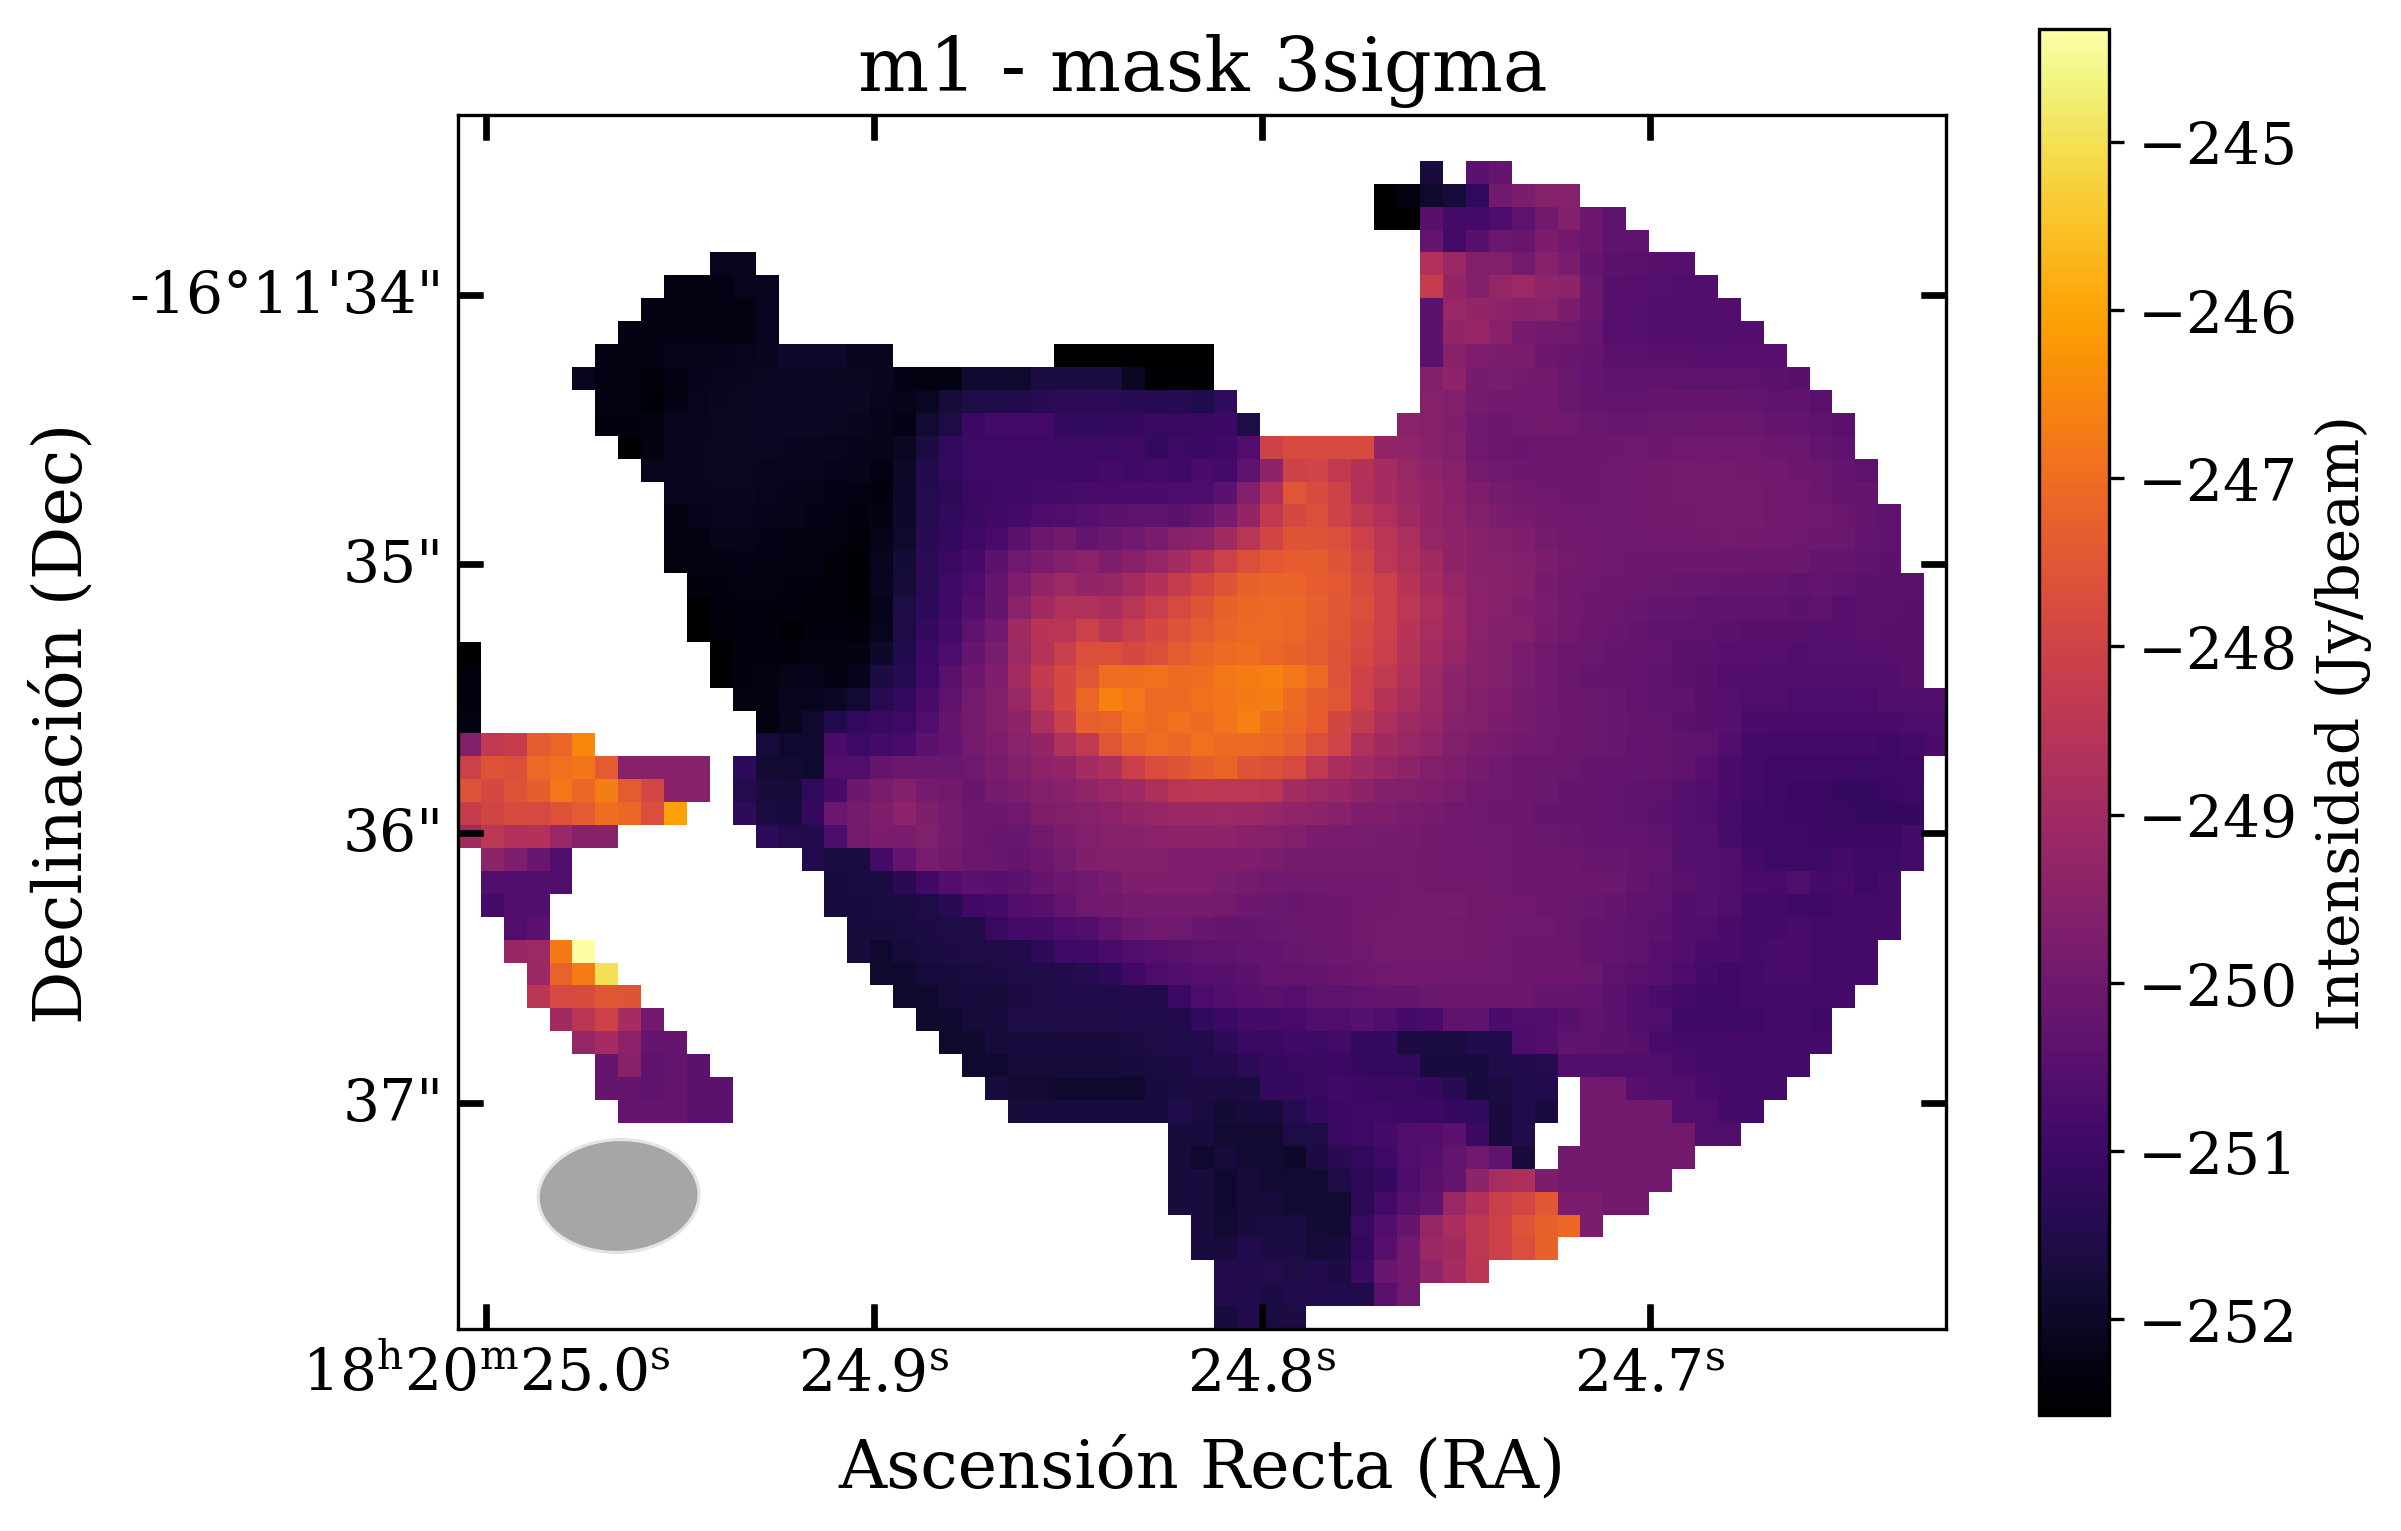

Archivos FITS cerrados.


In [22]:
#ALMA01669401_m0_nomask_CH3OCHO


fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m0_nomask_CH3OCHO.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="CH3OCHO")

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m1LOC_3sigma_CH3OCHO.fits"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m1 - mask 3sigma", object_name="")

plotter.close()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


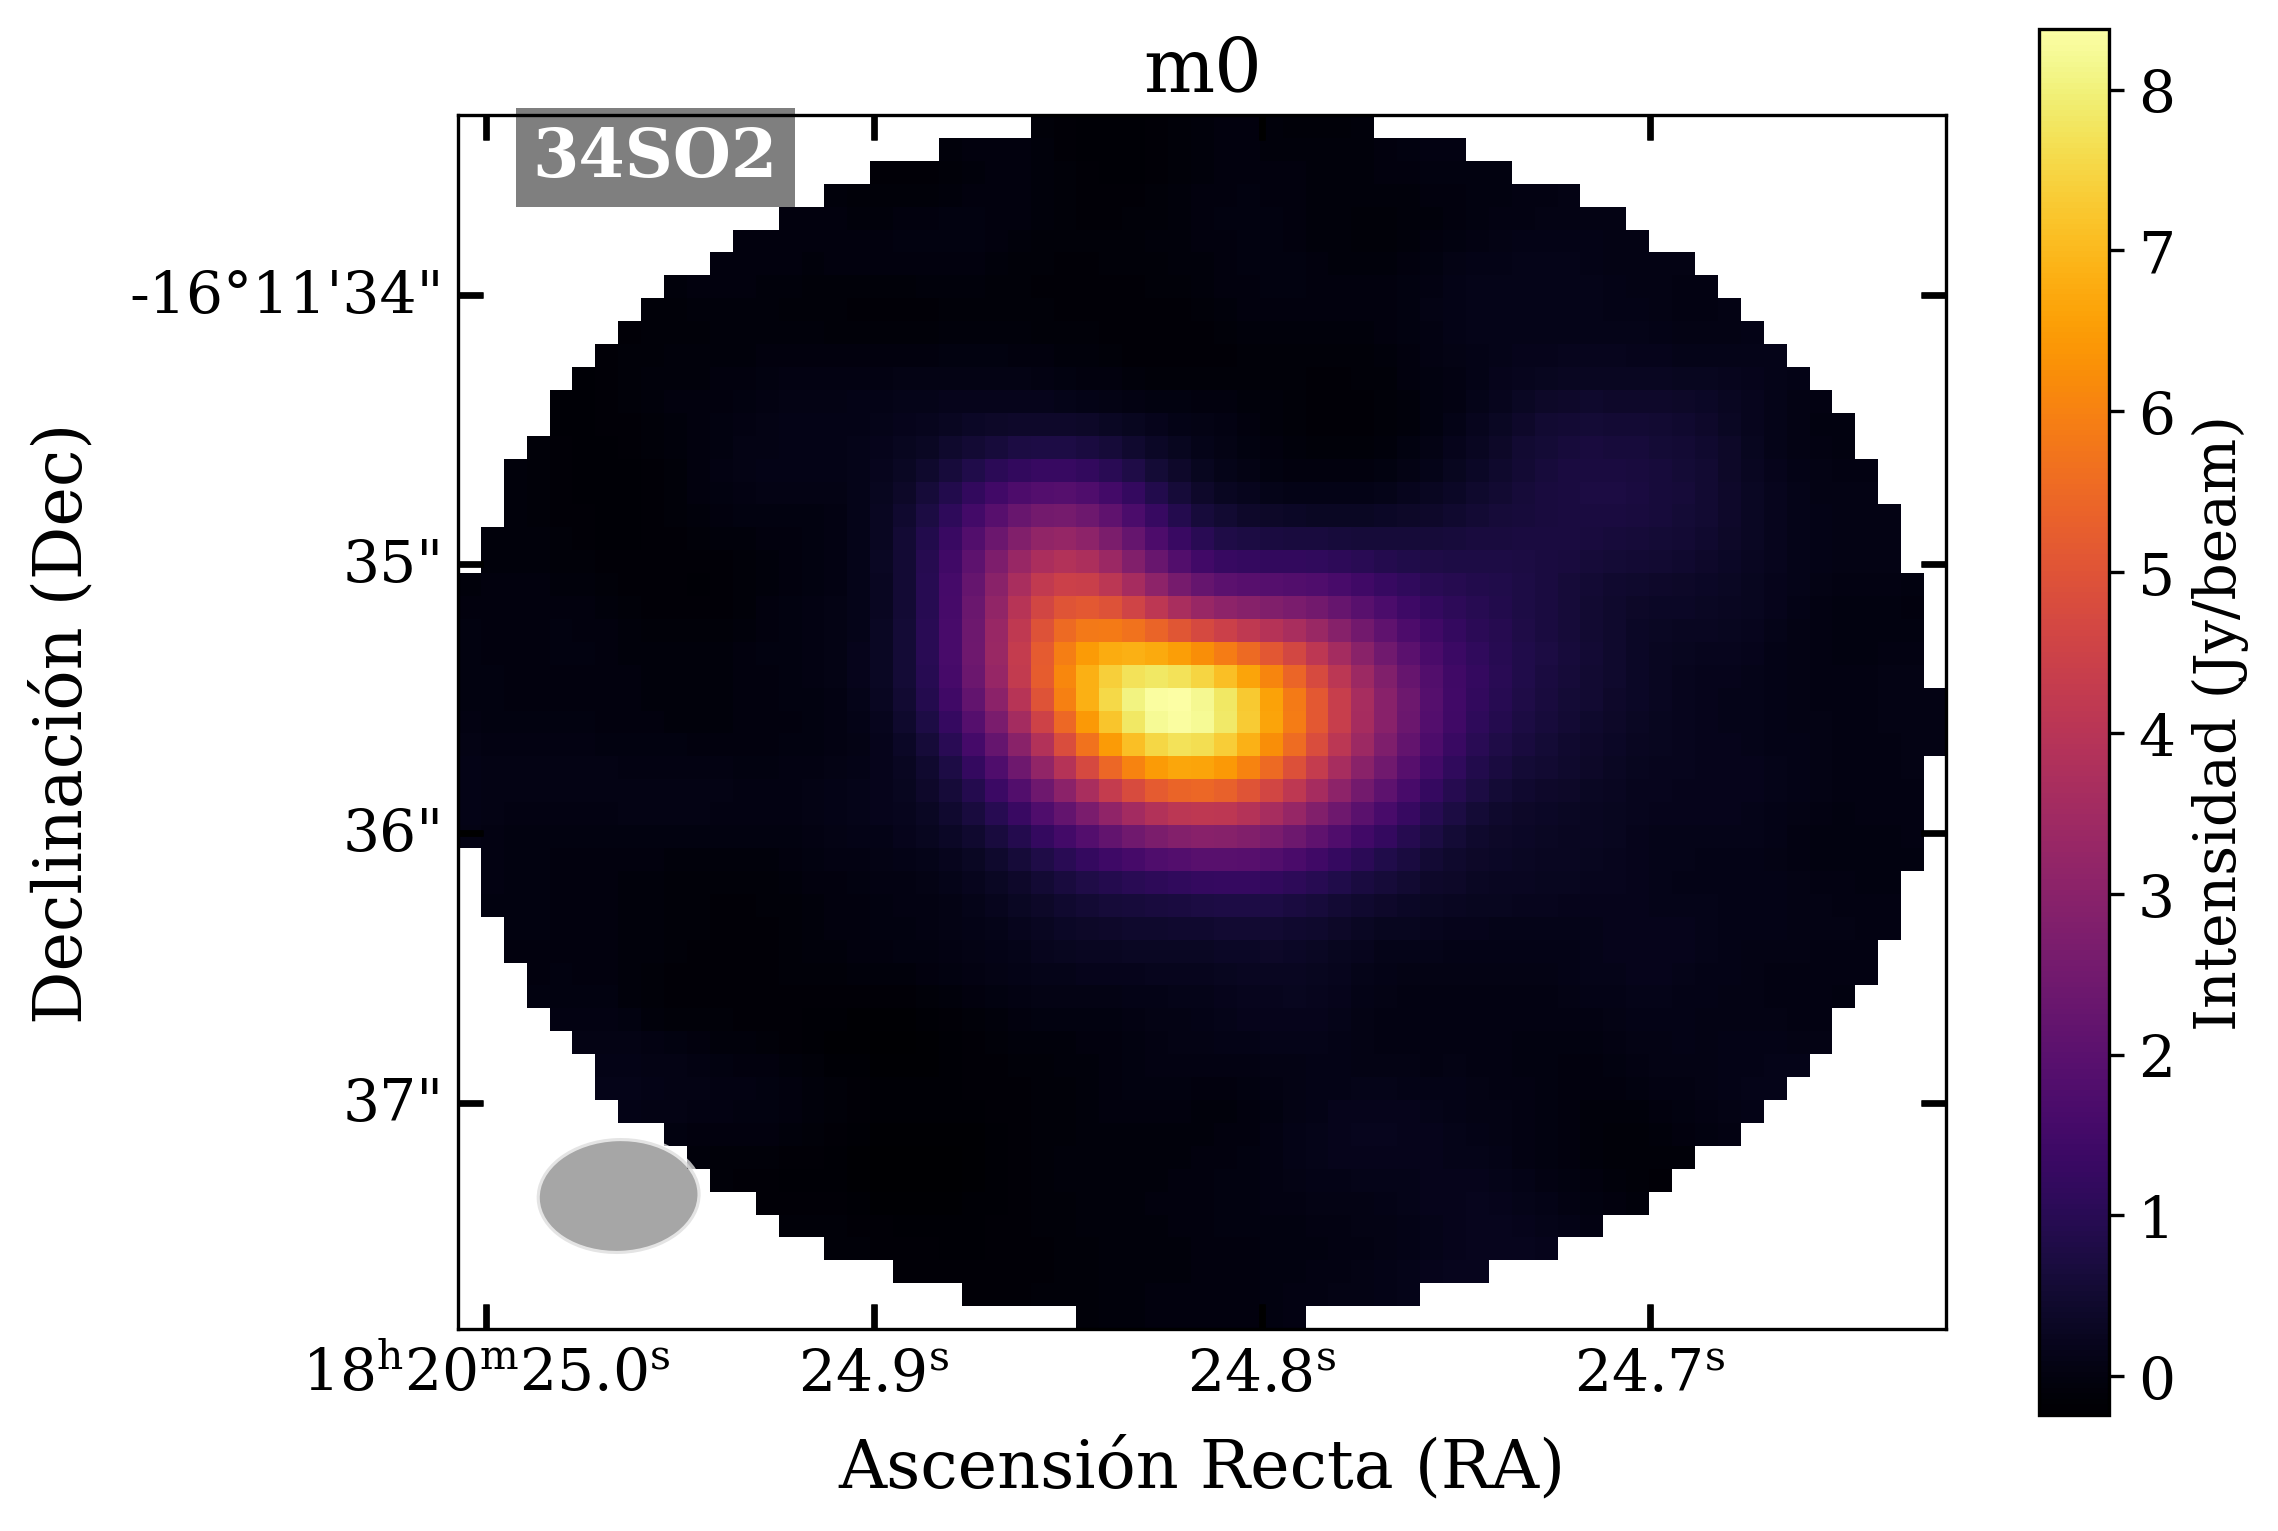

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


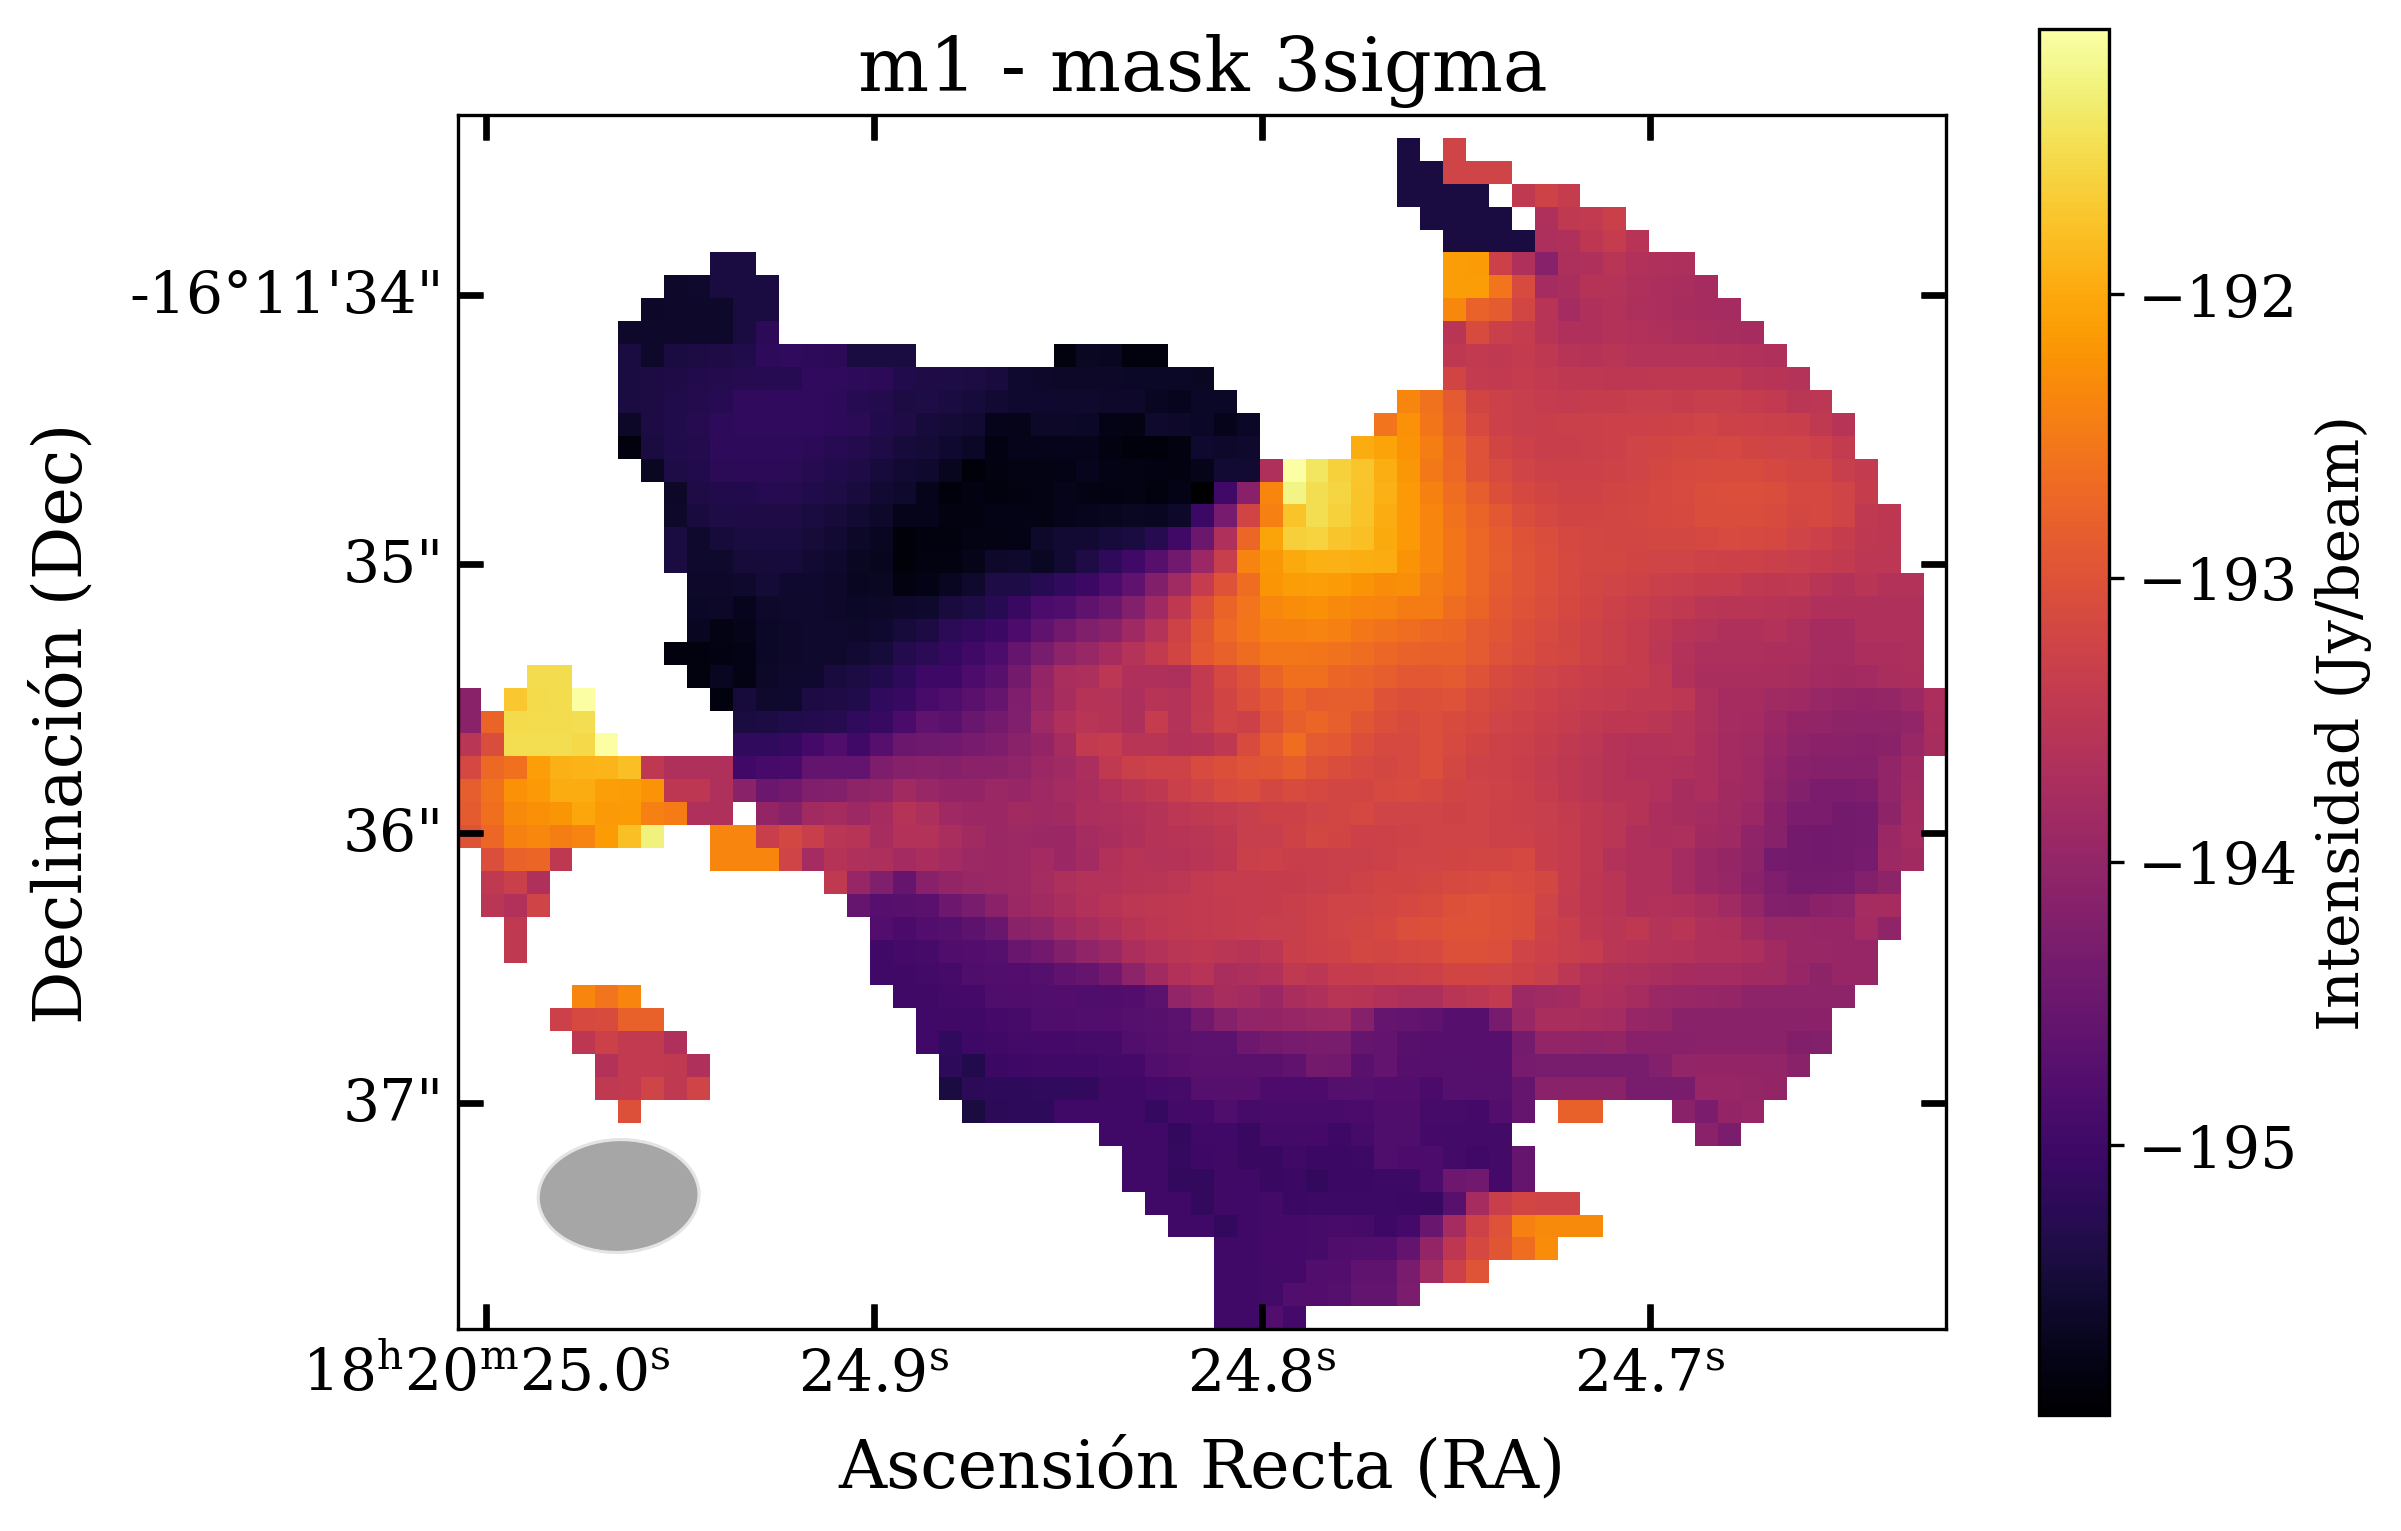

Archivos FITS cerrados.


In [23]:
#34SO2

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m0_nomask_34SO2.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="34SO2")

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m1_3sigma_34SO2.fits"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m1 - mask 3sigma", object_name="")

plotter.close()

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


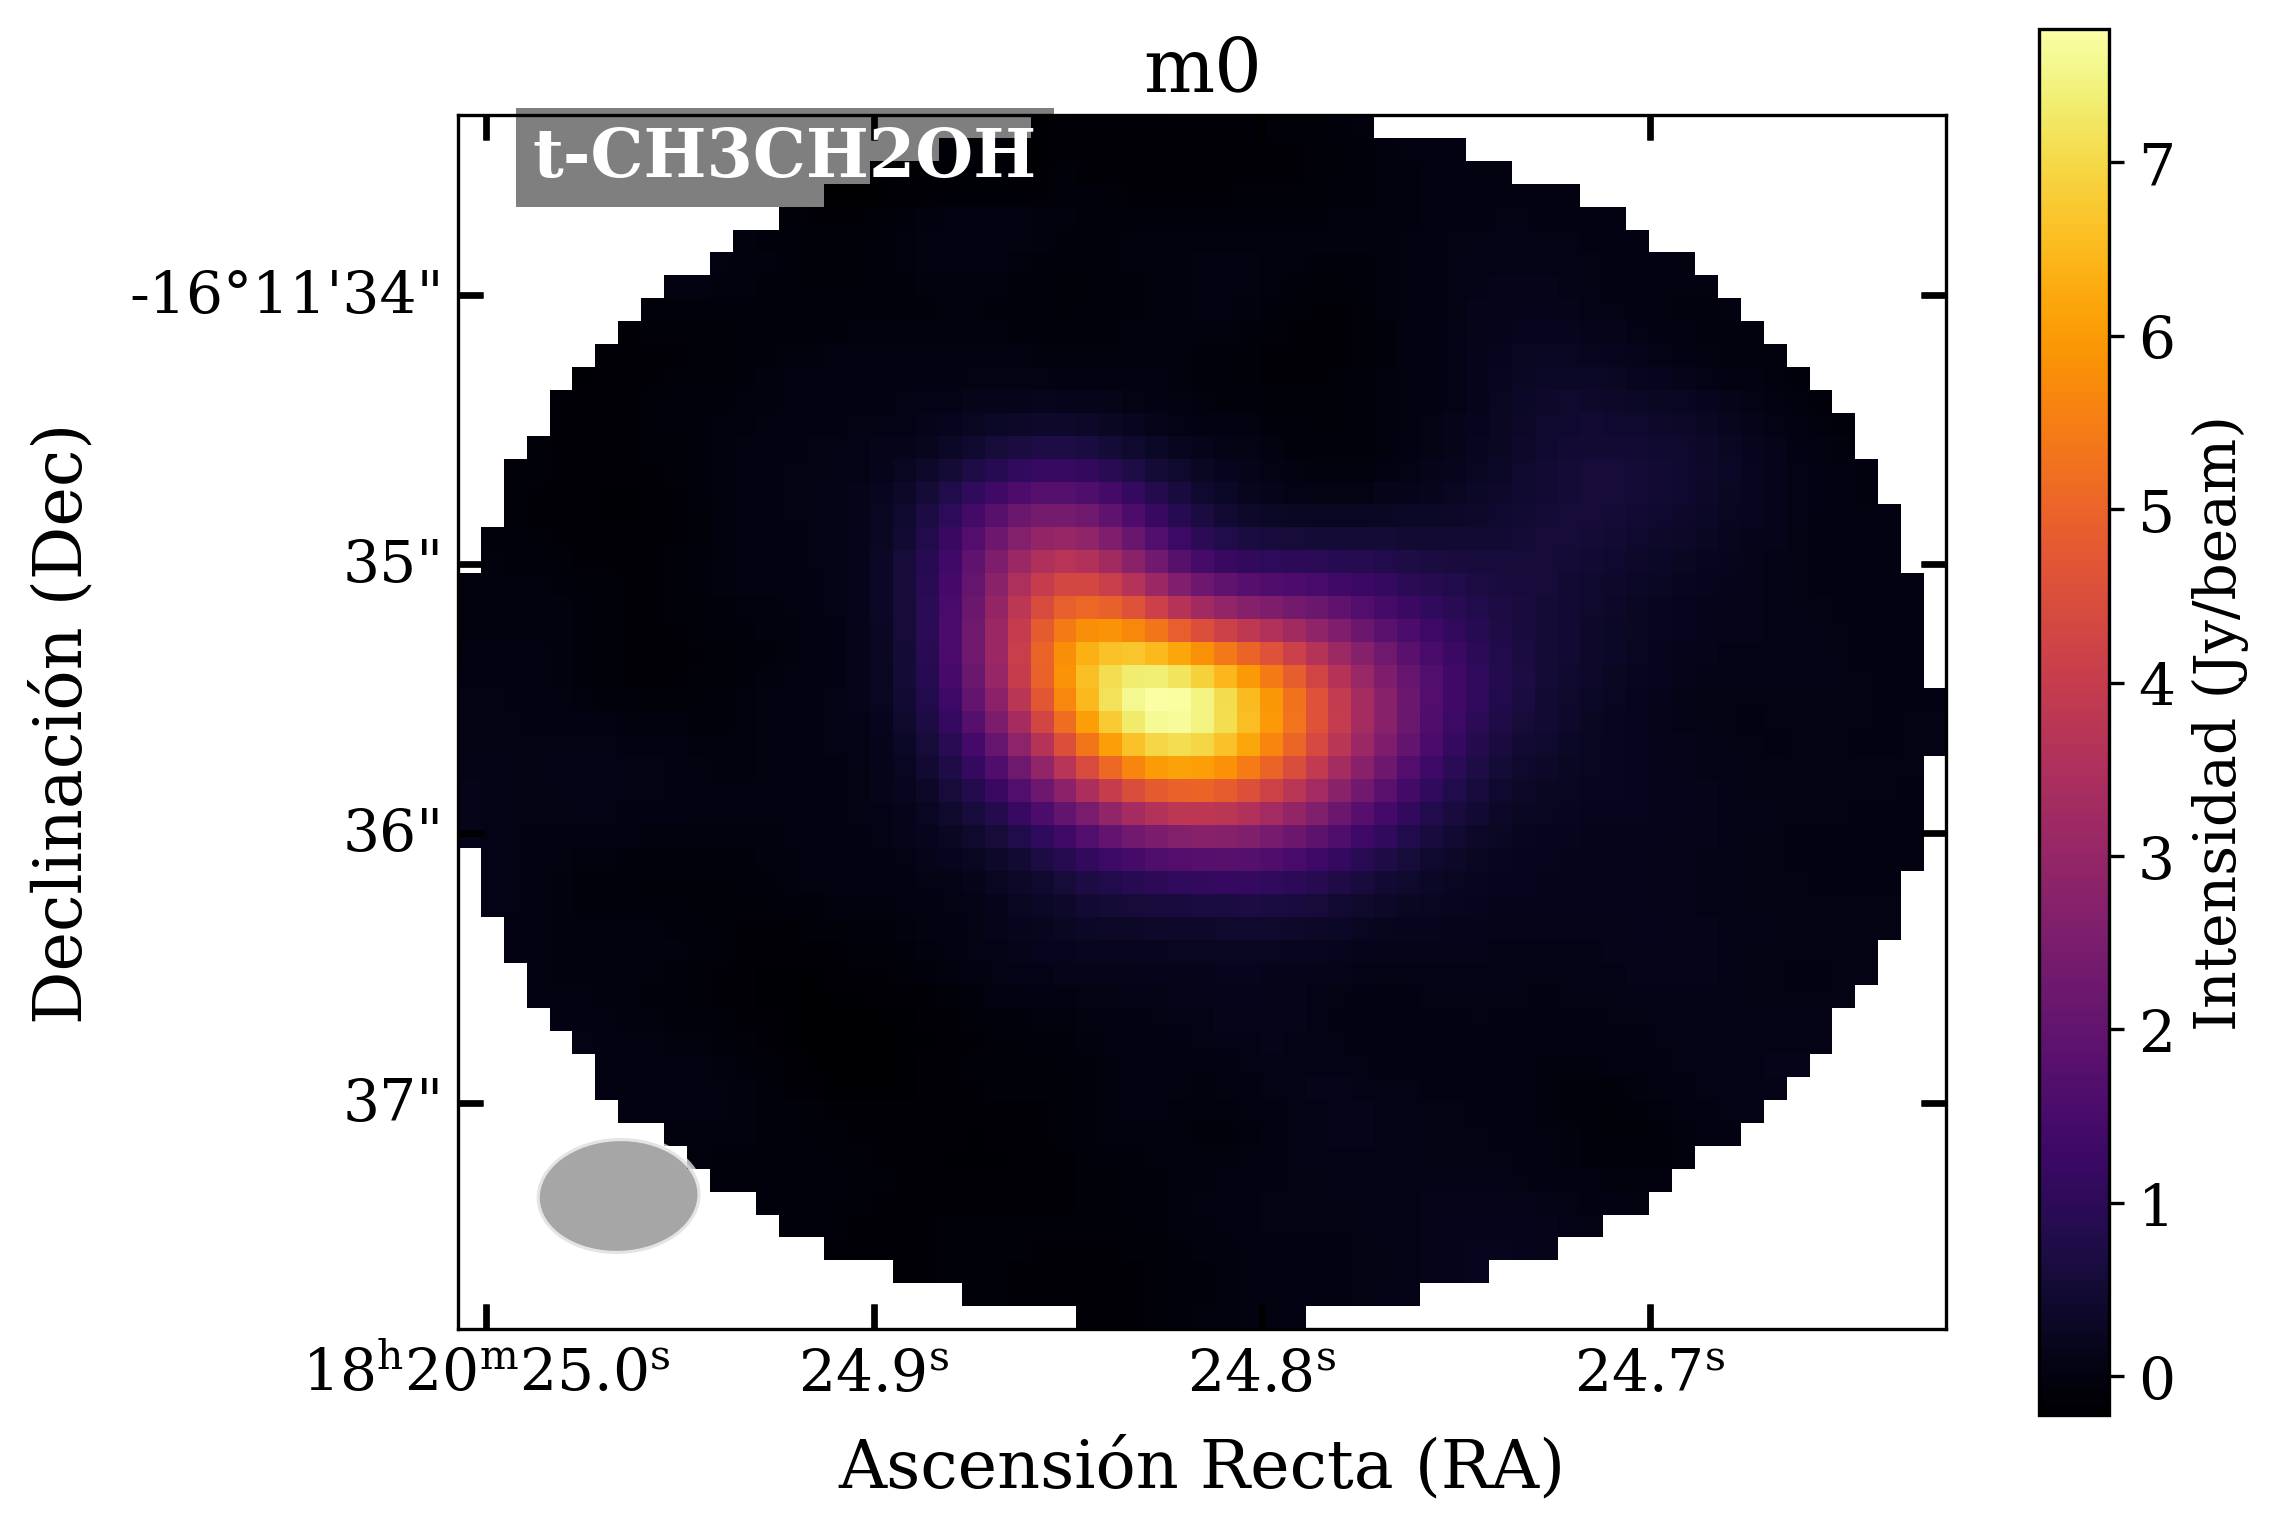

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


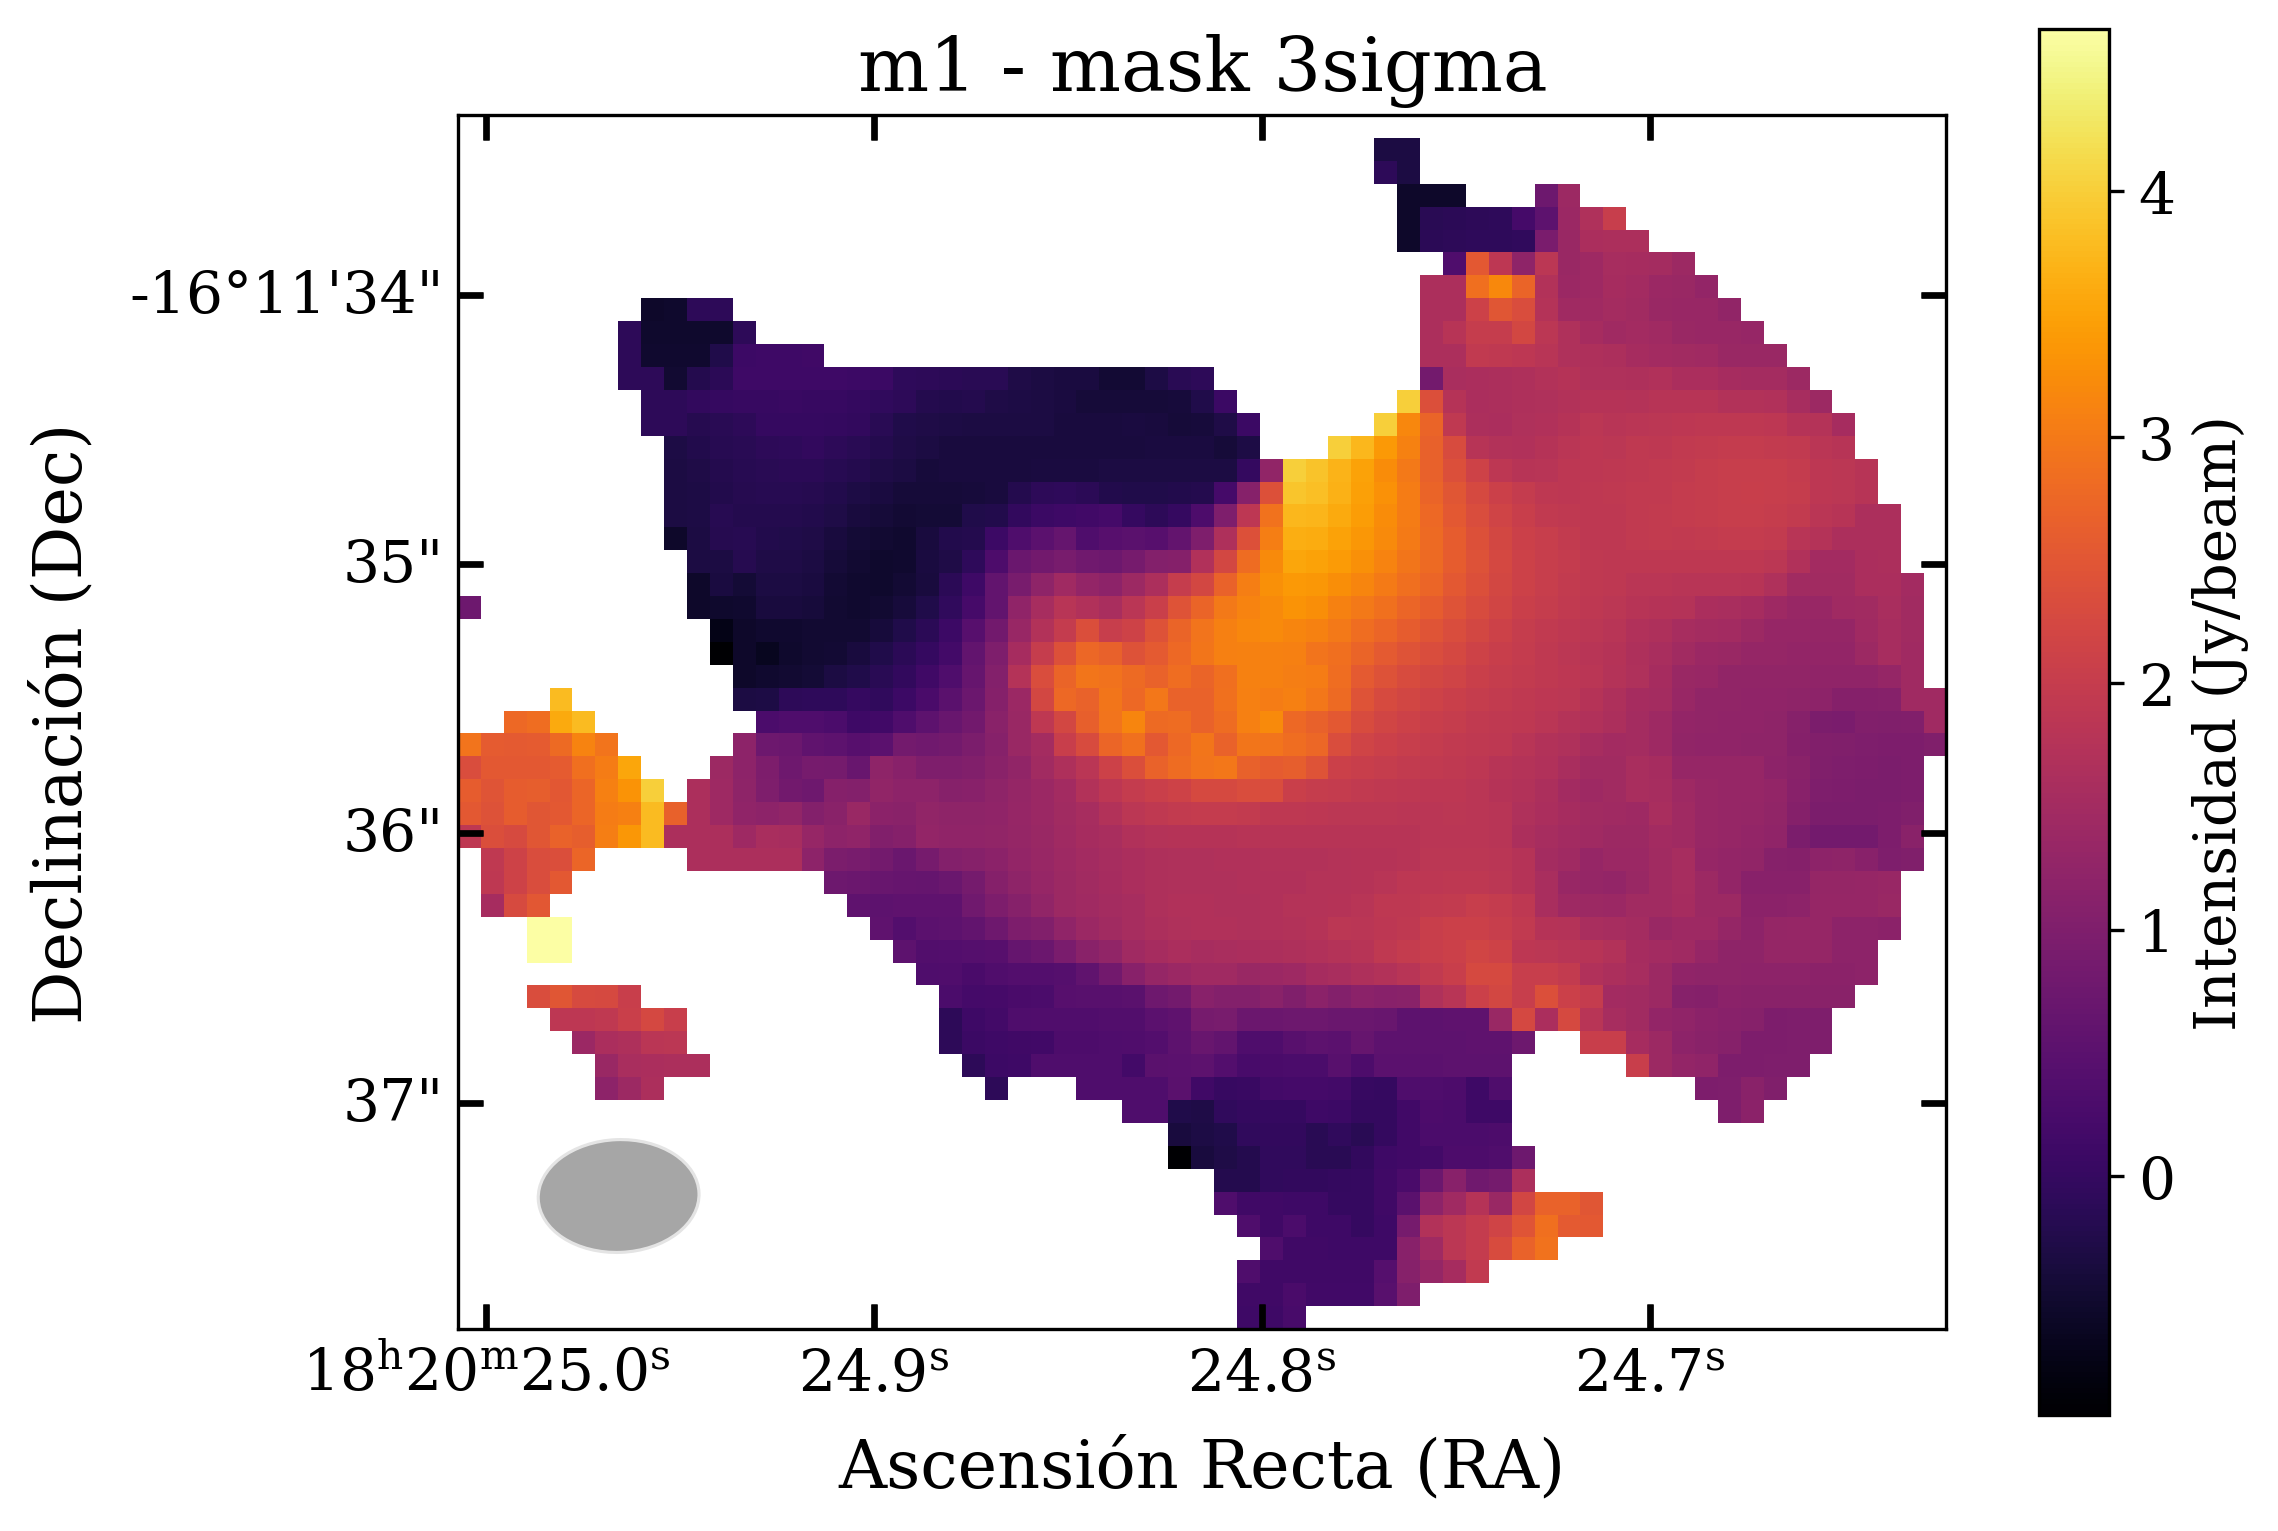

Archivos FITS cerrados.


In [5]:
#t-CH3CH2OH

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m0_nomask_t-CH3CH2OH.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="t-CH3CH2OH")

fits_file = "/home/holman/FILES/M17_P2019/ALMA01669401_m1_3sigma_t-CH3CH2OH.fits"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m1 - mask 3sigma", object_name="")

plotter.close()

### ALMA01507444:
#### CO
#### SIC2
- $\sigma$ promedio: 0.009753
- 3$\sigma$: 0.02926
- CO: En el cálculo de los momentos se ve un comportamiento que debo preguntar
- SiC2 no hay emisión ni cinemática apreciable en la región

Primeras filas del archivo:
   230.4758638784959  -2.3338820106e-4
0         230.475986         -0.000188
1         230.476108         -0.000745
2         230.476230         -0.000995
3         230.476352         -0.001138
4         230.476474         -0.002134
Columnas en el archivo: Index(['230.4758638784959', '-2.3338820106e-4'], dtype='object')
Máxima intensidad: 1.15832 Jy/beam a 230.51835 GHz


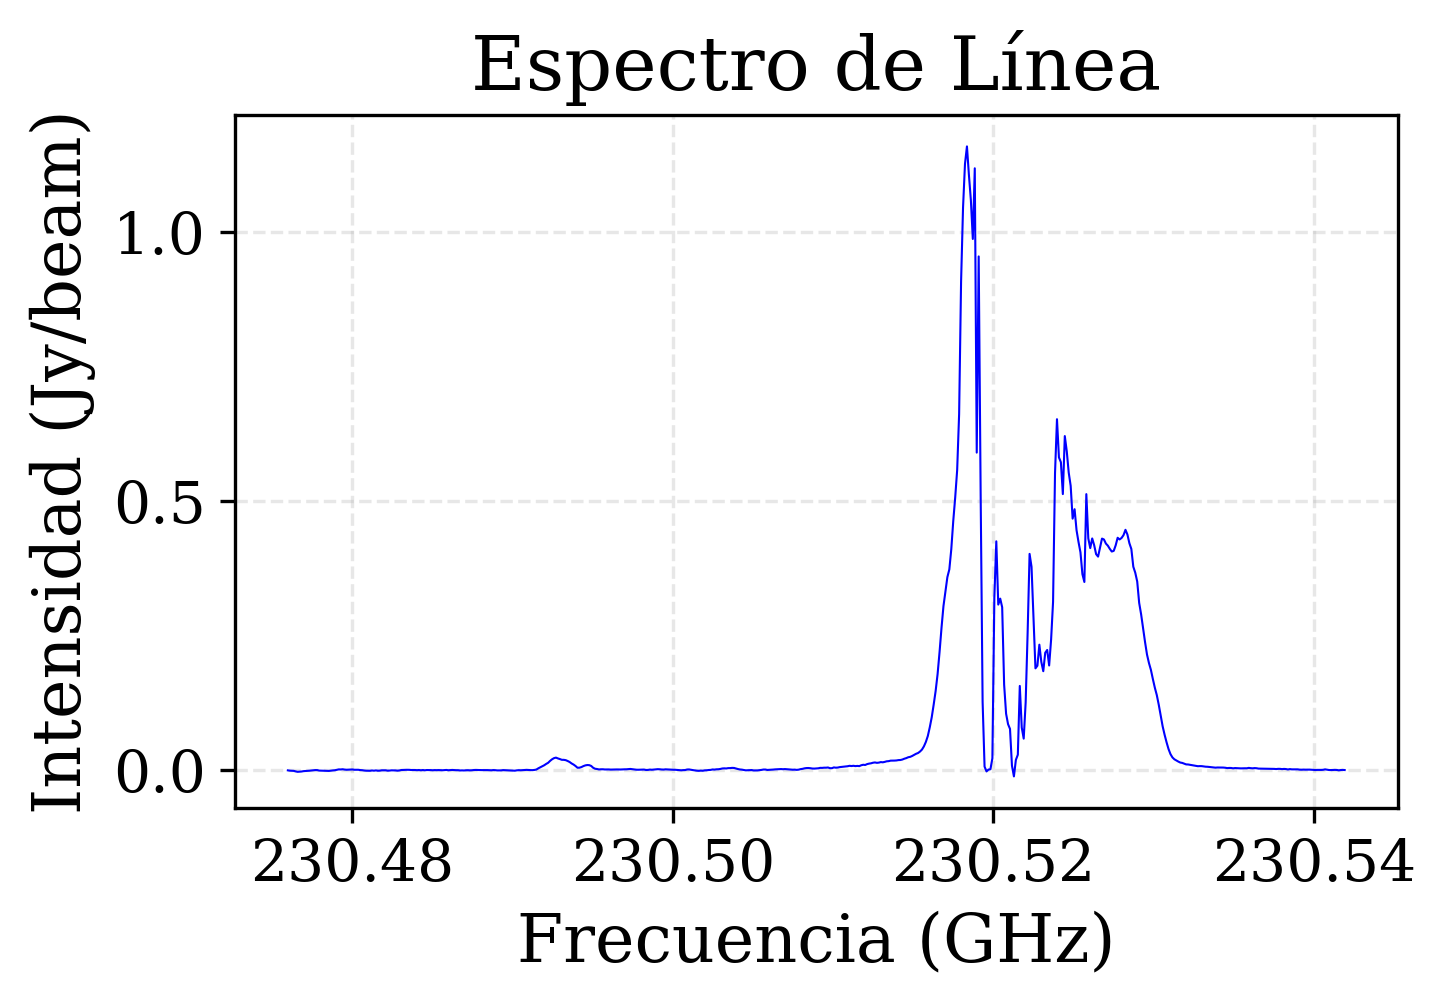

In [6]:
# Ruta del archivo
file_path = "/home/holman/FILES/M17_P2019/ALMA01507444.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-02-17-10-46-54.tsv"

# Cargar el archivo .tsv
spectral_data = pd.read_csv(file_path, sep='\t', comment='#')


# Mostrar las primeras filas del archivo
print("Primeras filas del archivo:")
print(spectral_data.head())

# Verificar las columnas disponibles
print("Columnas en el archivo:", spectral_data.columns)

# Suponiendo que las columnas sean ['Frecuencia', 'Intensidad']
frecuencia = spectral_data.iloc[:, 0]  # Primera columna
intensidad = spectral_data.iloc[:, 1]  # Segunda columna

# Encontrar el valor máximo de intensidad y su frecuencia correspondiente
max_intensidad = intensidad.max()
max_frecuencia = frecuencia[intensidad.idxmax()]
print(f"Máxima intensidad: {max_intensidad:.5f} Jy/beam a {max_frecuencia:.5f} GHz")


# Crear gráfica de frecuencia vs intensidad
plt.figure(figsize=(5, 3))
plt.plot(frecuencia, intensidad, color='blue', linewidth=0.5)
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Intensidad (Jy/beam)')
plt.title('Espectro de Línea')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


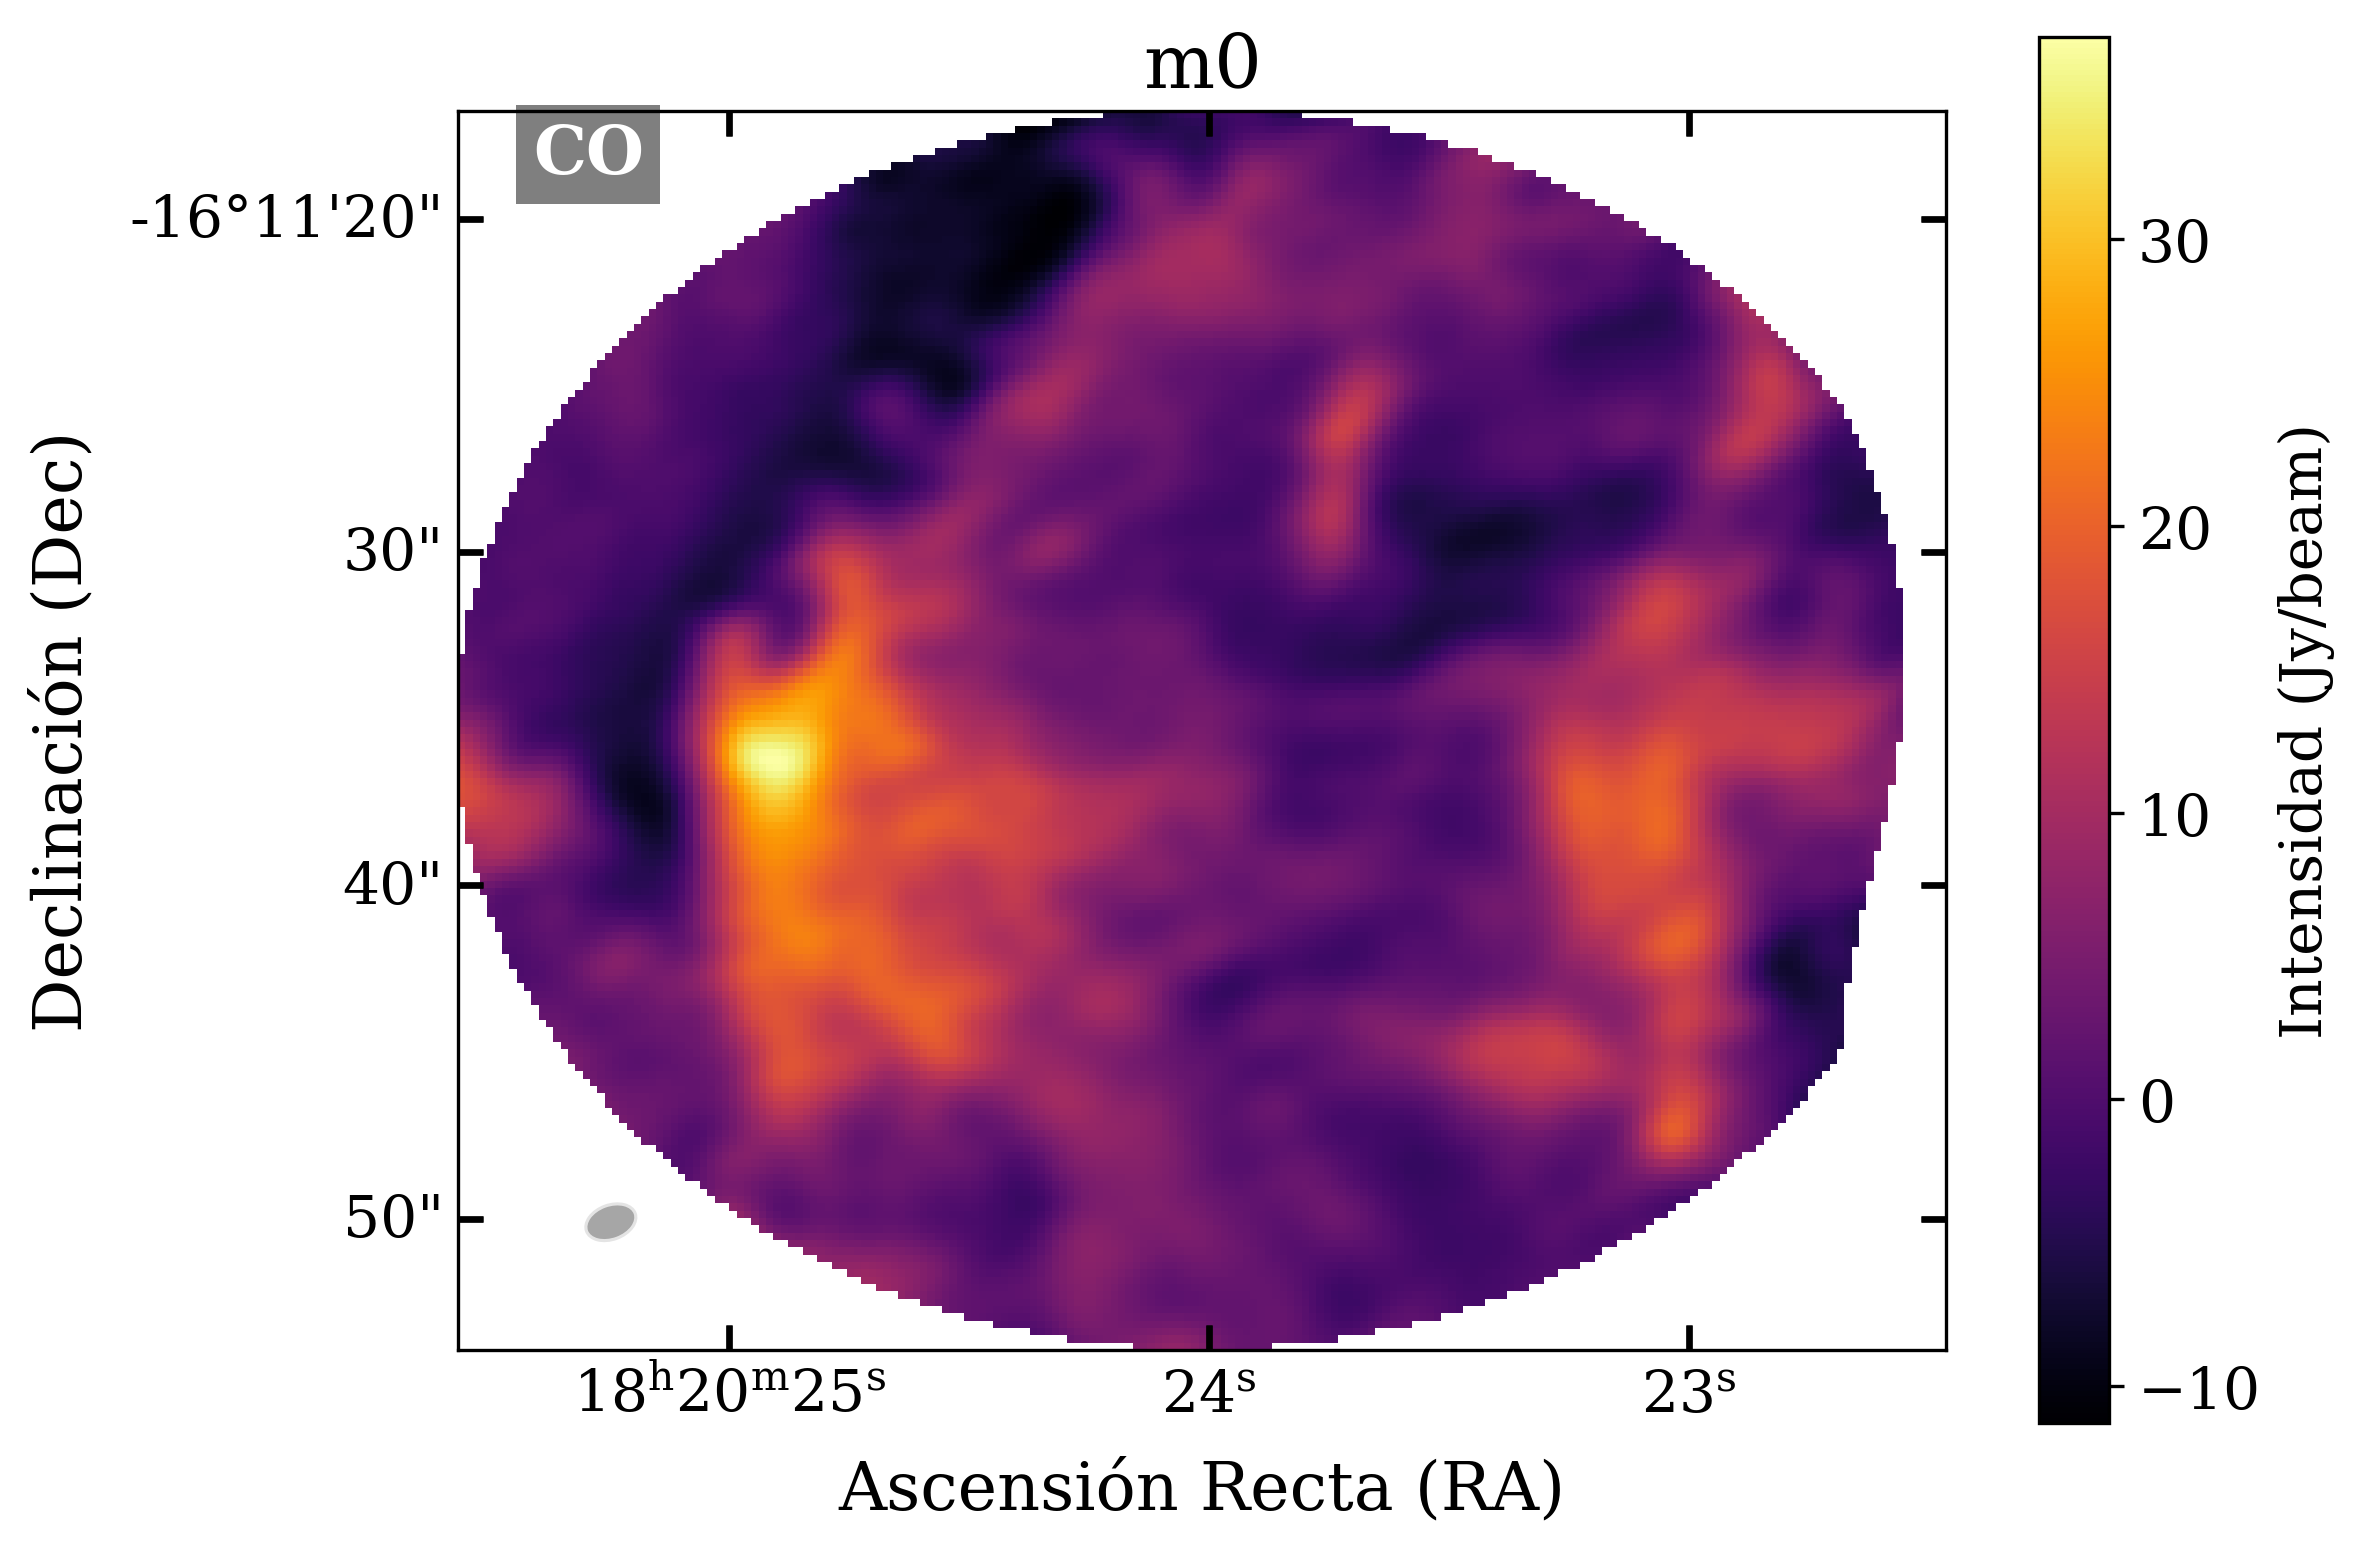

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


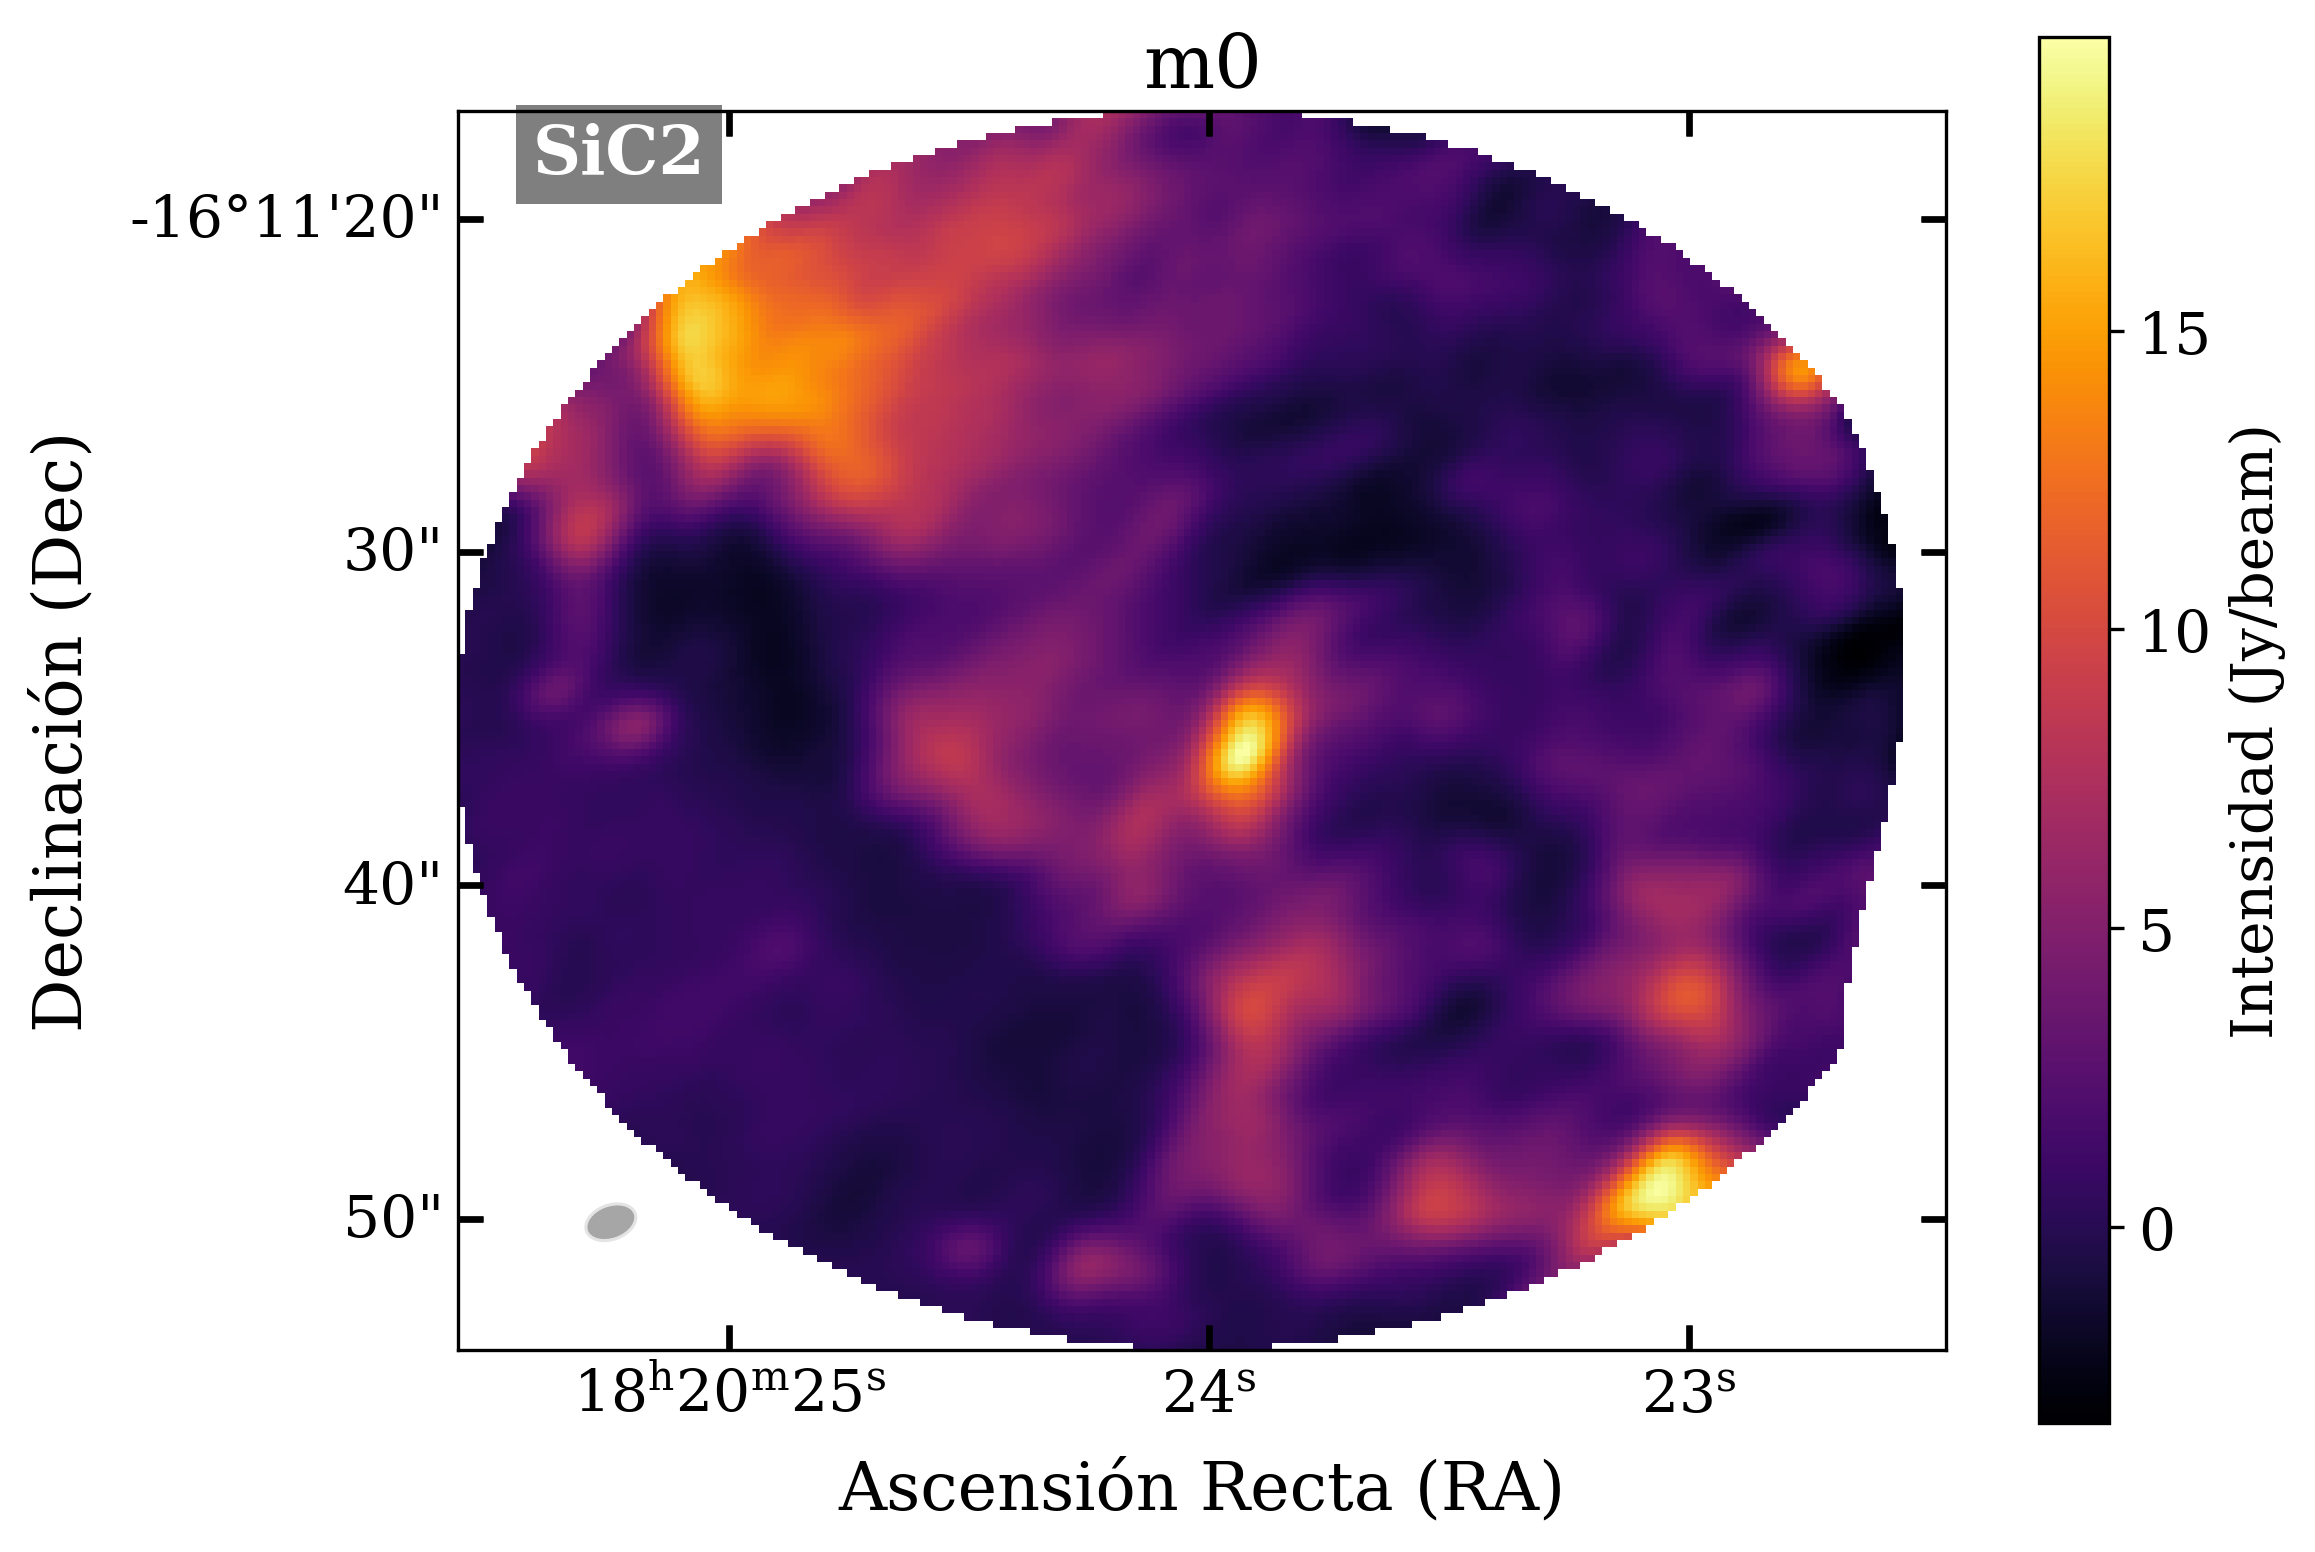

Archivos FITS cerrados.


In [12]:
#34SO2

fits_file = "/home/holman/FILES/M17_P2019/ALMA01507444_m0_nomask_CO.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="CO")

fits_file = "/home/holman/FILES/M17_P2019/ALMA01507444_m0_nomask_SiC2.fits"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="SiC2")

plotter.close()

### ALMA01586173: Cr

- $\sigma$ promedio: 0.058016
- 3$\sigma$: 0.174049
- No se observa un gradiente de velocidad (preguntar)

Primeras filas del archivo:
   391.32188348600005  2.2831605828e-3
0          391.322372         0.002143
1          391.322860        -0.005747
2          391.323349        -0.005994
3          391.323837        -0.000137
4          391.324325        -0.001913
Columnas en el archivo: Index(['391.32188348600005', '2.2831605828e-3'], dtype='object')
Máxima intensidad: 0.90718 Jy/beam a 391.81952 GHz


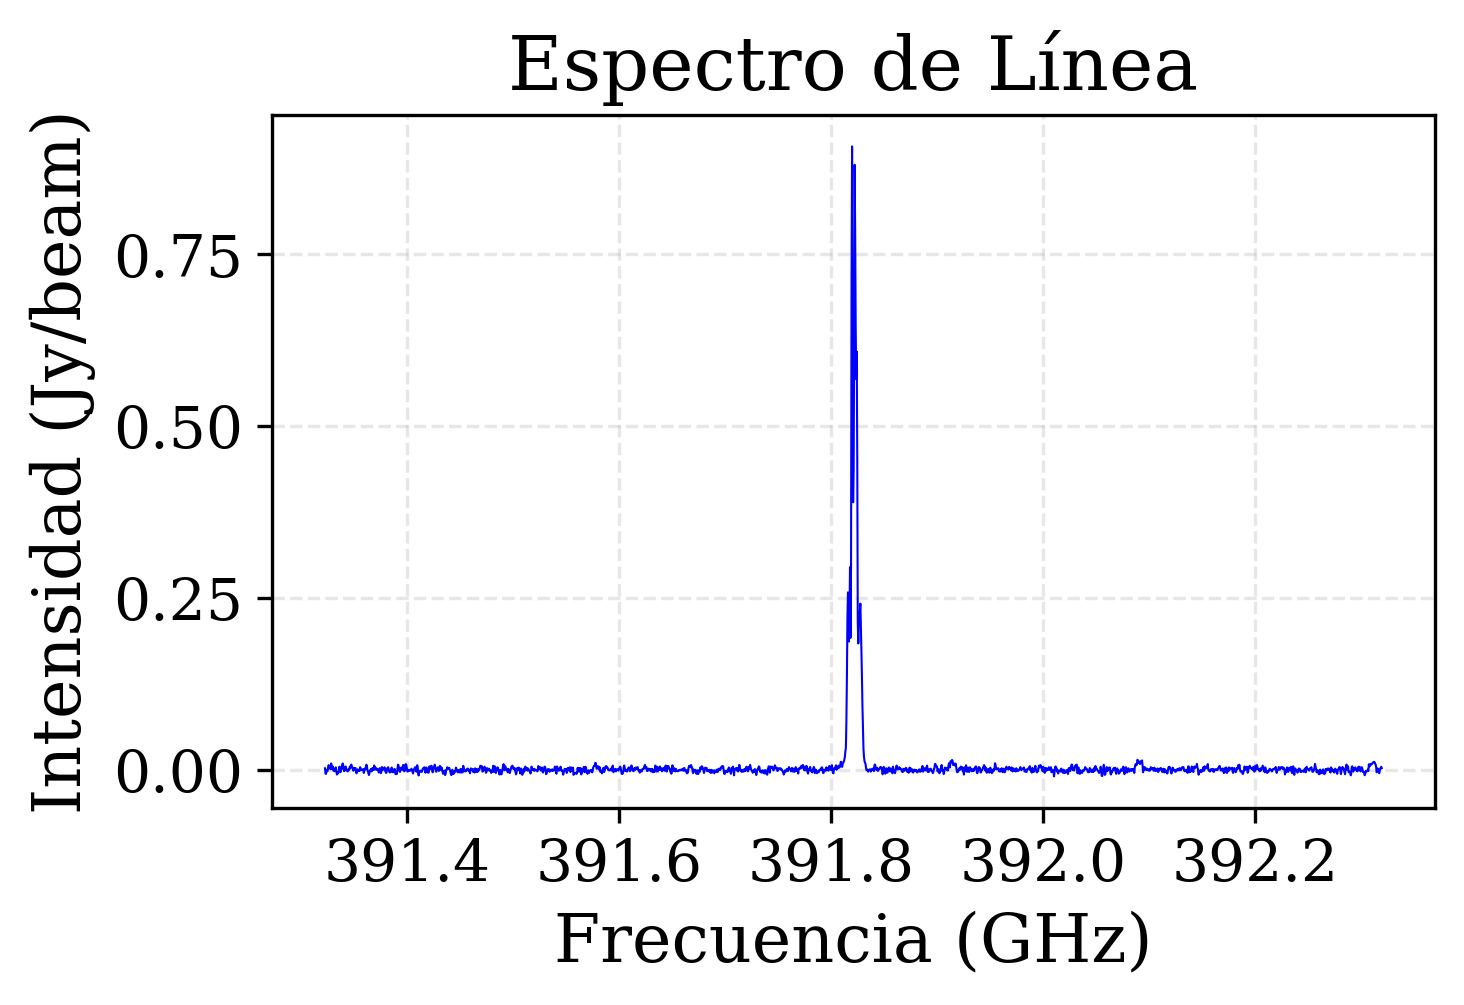

In [15]:
# Ruta del archivo
file_path = "/home/holman/FILES/M17_P2019/ALMA01586173.fits-Z-profile-Region_1-Statistic_Mean-Coordinate_Current-2025-02-17-11-04-15.tsv"

# Cargar el archivo .tsv
spectral_data = pd.read_csv(file_path, sep='\t', comment='#')


# Mostrar las primeras filas del archivo
print("Primeras filas del archivo:")
print(spectral_data.head())

# Verificar las columnas disponibles
print("Columnas en el archivo:", spectral_data.columns)

# Suponiendo que las columnas sean ['Frecuencia', 'Intensidad']
frecuencia = spectral_data.iloc[:, 0]  # Primera columna
intensidad = spectral_data.iloc[:, 1]  # Segunda columna

# Encontrar el valor máximo de intensidad y su frecuencia correspondiente
max_intensidad = intensidad.max()
max_frecuencia = frecuencia[intensidad.idxmax()]
print(f"Máxima intensidad: {max_intensidad:.5f} Jy/beam a {max_frecuencia:.5f} GHz")


# Crear gráfica de frecuencia vs intensidad
plt.figure(figsize=(5, 3))
plt.plot(frecuencia, intensidad, color='blue', linewidth=0.5)
plt.xlabel('Frecuencia (GHz)')
plt.ylabel('Intensidad (Jy/beam)')
plt.title('Espectro de Línea')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


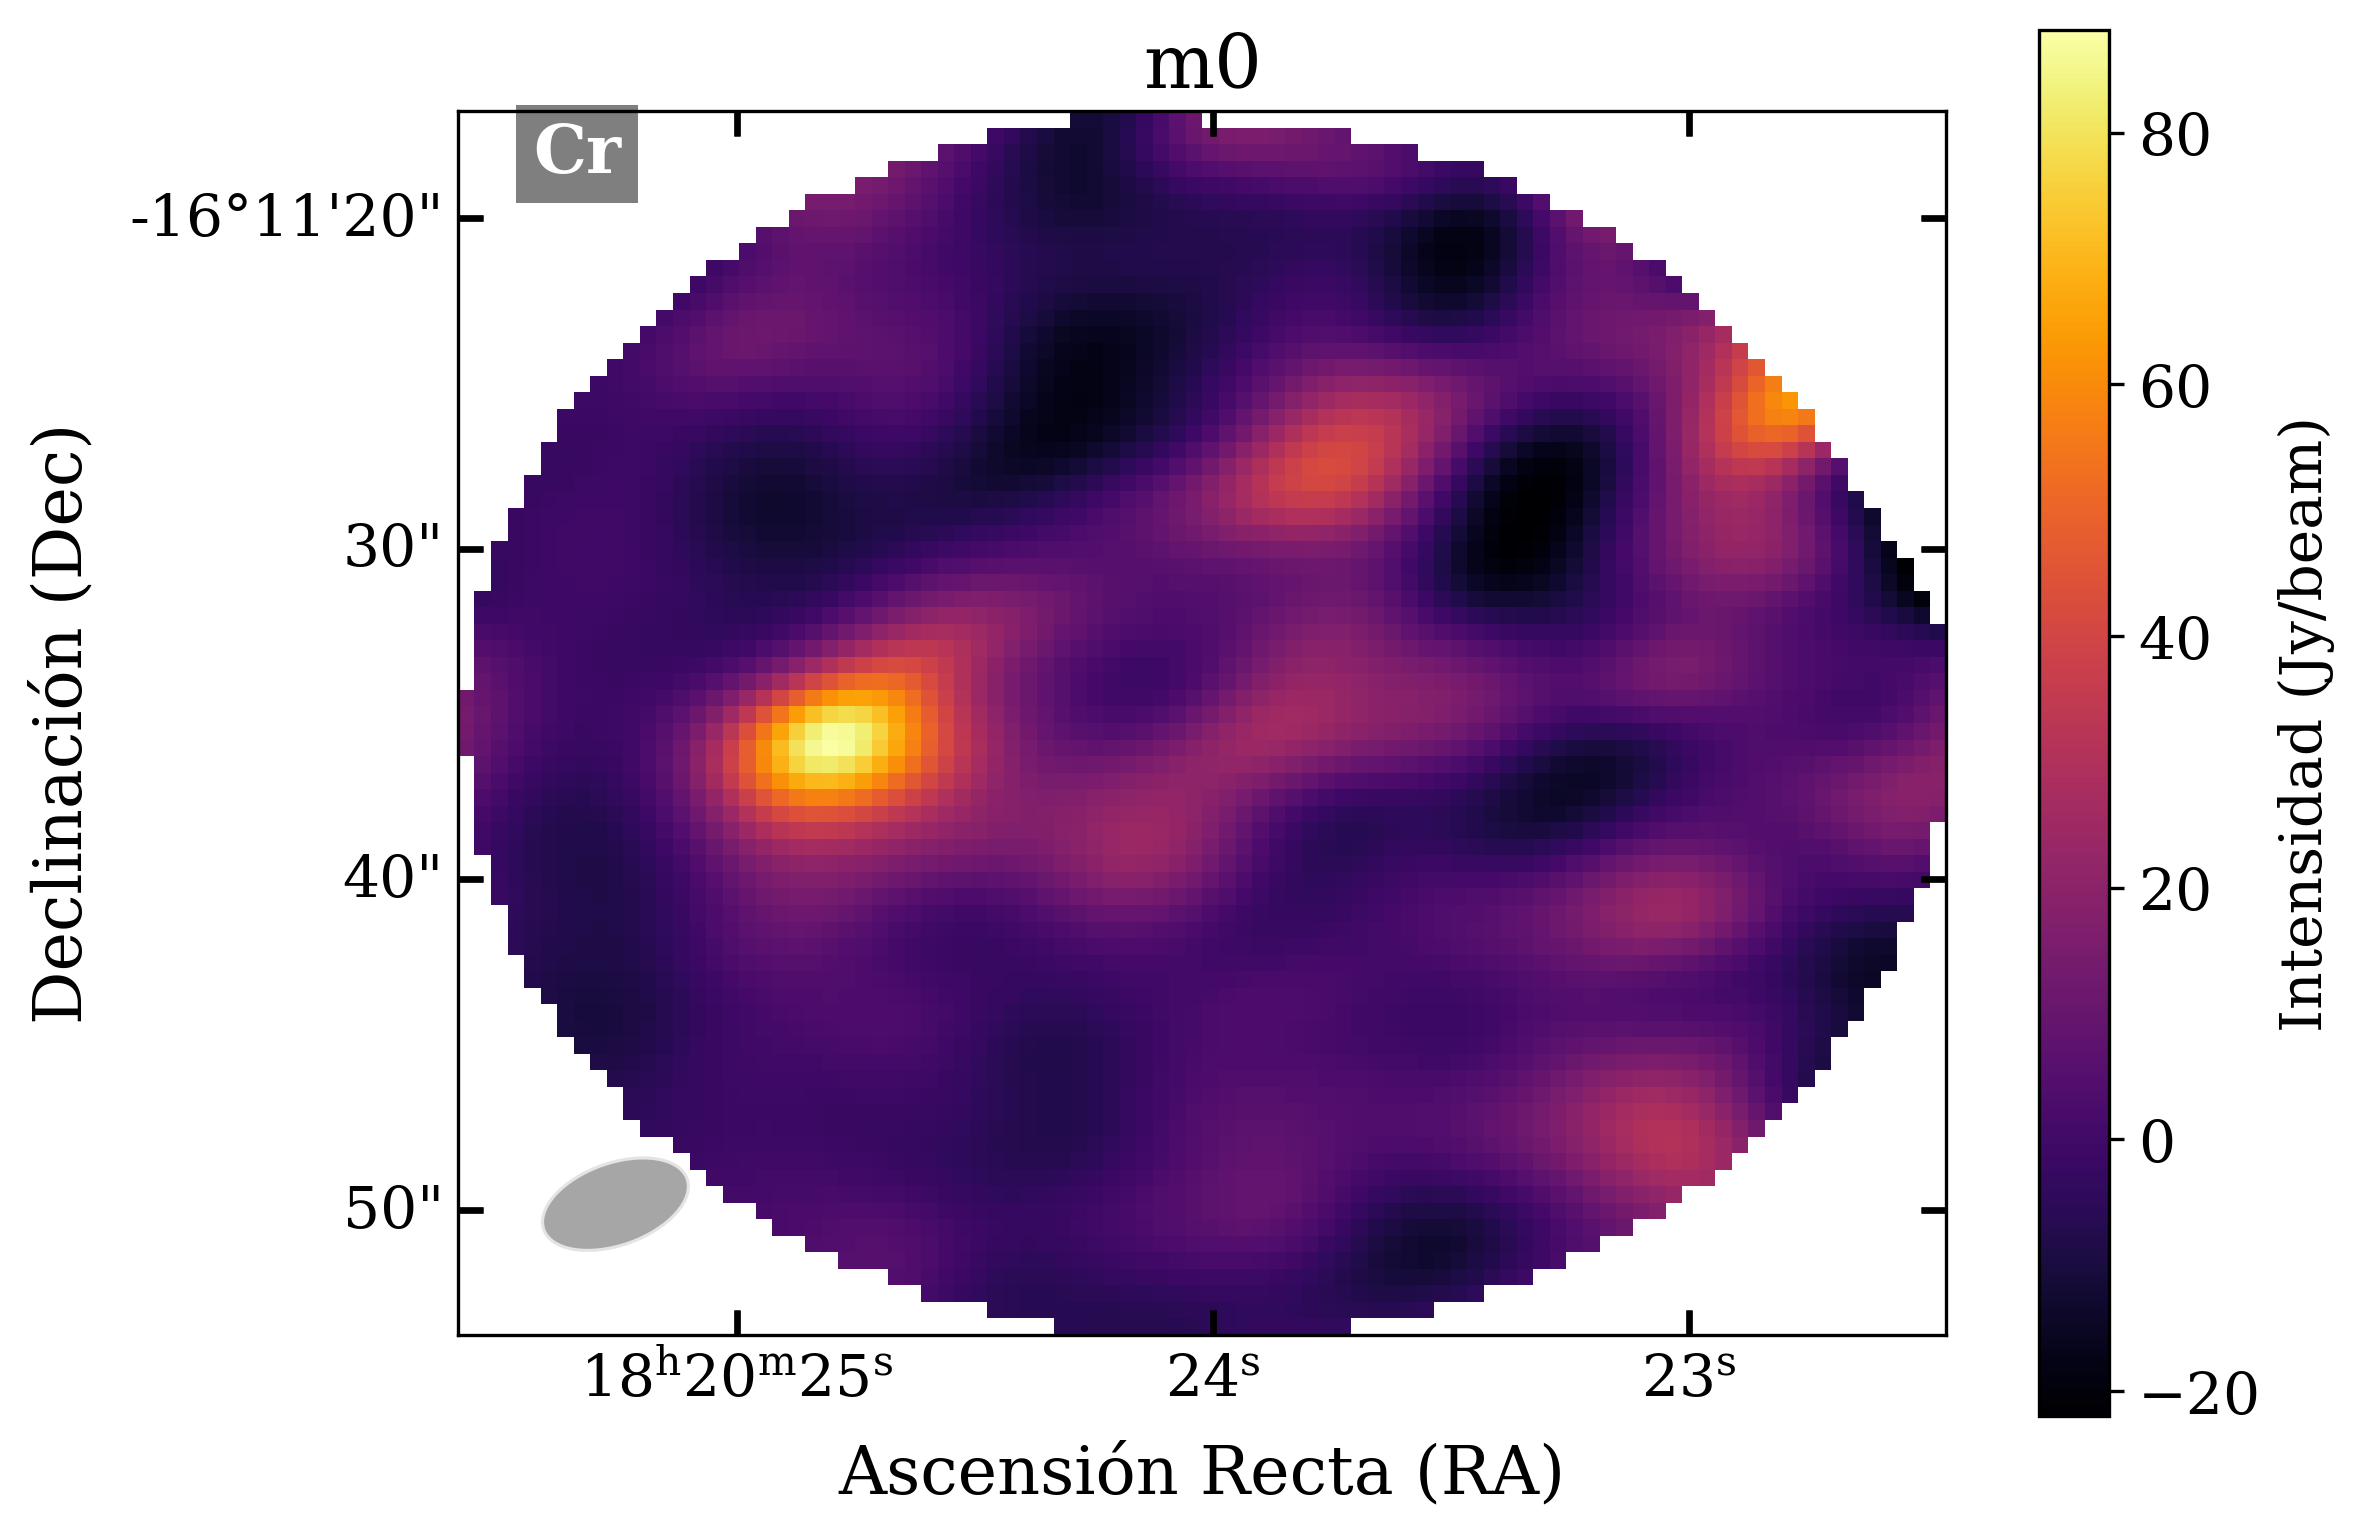

Archivos FITS cerrados.


In [17]:
#34SO2

fits_file = "/home/holman/FILES/M17_P2019/ALMA01586173_m0_nomask_Cr.fits"
#fits_file = "/home/jennifer/casa/M17_p2015/ALMB00094768_contour.png"
plotter = FITSPlotter(image_fits=fits_file)
plotter.plot(title="m0", object_name="Cr")

# fits_file = "/home/holman/FILES/M17_P2019/ALMA01507444_m0_nomask_SiC2.fits"
# plotter = FITSPlotter(image_fits=fits_file)
# plotter.plot(title="m0", object_name="SiC2")

plotter.close()

## Emisión del gas molecular

Las **líneas moleculares** permiten estudiar la estructura y dinámica del gas denso en la UC-HII. Para ello, se realizarán mapas de momentos.


## Emisión del gas ionizado

Las **líneas de recombinación** permiten estudiar la estructura y dinámica del gas ionizado en la UC-HII. Estas líneas trazan la distribución de electrones libres y pueden revelar procesos de expansión, colapso o interacción con el gas molecular circundante.
